In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
sns.set()
from tqdm import tqdm_notebook

#Will display a progress bar when using progress_map() or progress_apply()
# Create and register a new `tqdm` instance with `pandas`
# tqdm_notebook().pandas()


#Load the combined file of all the data from LMT recordings
df = pd.read_csv(r"F:\LMT\Magel2\Analyses, Graphs, Results\Hab\Habituation 5hours\Habituation_5hours_1h-bins.csv")
df = df.drop(columns=["Filename","Unnamed: 0"]) #Remove Untitled and Filename Columns
df["bin"]=df["bin"].str[3:]
df["bin"]=pd.to_numeric(df["bin"]) # Put bins into Integer form !
df

Date   Cage Session  bin  start_frame  stop_frame           name  idA  \
0     190812  Cage3    Hab1    0         2000      110000           Move    1   
1     190812  Cage3    Hab1    0         2000      110000           Move    3   
2     190812  Cage3    Hab1    0         2000      110000           Move    2   
3     190812  Cage3    Hab1    0         2000      110000  Move isolated    1   
4     190812  Cage3    Hab1    0         2000      110000  Move isolated    3   
...      ...    ...     ...  ...          ...         ...            ...  ...   
7480  190911  Cage6    Hab1    4       434000      542000          Nest4    4   
7481  190911  Cage6    Hab1    4       434000      542000          Nest4    4   
7482  190911  Cage6    Hab1    4       434000      542000          Nest4    4   
7483  190911  Cage6    Hab1    4       434000      542000          Nest4    4   
7484  190911  Cage6    Hab1    4       434000      542000          Nest4    4   

      idB  idC  ...   GenoB   GenoC   GenoD  totalLength  meanLength  \
0     NaN  NaN  ...     NaN     NaN     NaN        27382    9.127333   
1     NaN  NaN  ...     NaN     NaN     NaN        28212    8.981853   
2     NaN  NaN  ...     NaN     NaN     NaN        32043    9.865456   
3     NaN  NaN  ...     NaN     NaN     NaN        18244    8.956308   
4     NaN  NaN  ...     NaN     NaN     NaN        20996    9.339858   
...   ...  ...  ...     ...     ...     ...          ...         ...   
7480  1.0  2.0  ...  KO_OXT  WT_OXT  KO_OXT            0         NaN   
7481  3.0  1.0  ...  KO_OXT  KO_OXT  WT_OXT            0         NaN   
7482  3.0  2.0  ...  KO_OXT  WT_OXT  KO_OXT            0         NaN   
7483  2.0  1.0  ...  WT_OXT  KO_OXT  KO_OXT            0         NaN   
7484  2.0  3.0  ...  WT_OXT  KO_OXT  KO_OXT            0         NaN   

     medianLength numberOfEvents  stdLength  CI95_low    CI95_up  
0             5.0           3000  11.549969  8.714023   9.540644  
1             5.0           3141  10.839807  8.602762   9.360944  
2             6.0           3248  11.569667  9.467560  10.263351  
3             5.0           2037  11.053827  8.476273   9.436344  
4             5.0           2248  10.960142  8.886778   9.792937  
...           ...            ...        ...       ...        ...  
7480          NaN              0        NaN       NaN        NaN  
7481          NaN              0        NaN       NaN        NaN  
7482          NaN              0        NaN       NaN        NaN  
7483          NaN              0        NaN       NaN        NaN  
7484          NaN              0        NaN       NaN        NaN  

[7485 rows x 26 columns]

In [19]:
df.name.unique()

array(['Move', 'Move isolated', 'Rearing', 'Rear isolated',
       'Stop isolated', 'WallJump', 'SAP', 'Huddling', 'WaterPoint',
       'Contact', 'Oral-oral Contact', 'Oral-genital Contact',
       'Side by side Contact', 'Side by side Contact, opposite way',
       'Social approach', 'Social escape', 'Approach contact',
       'Approach rear', 'Break contact', 'Get away',
       'FollowZone Isolated', 'Train2', 'Group2', 'Group3', 'Group4',
       'Nest4'], dtype=object)

In [20]:
df[df.name=='Break contact']["totalLength"].sum()

497164

# 1) Behavior with ONLY one Animal:

## 1.1) Create a dataframe "dfOne" with the behaviors involving only one animal!


In [21]:
#Create a dataframe "dfOne" with the behaviors involving only one animal!
behaviorsOne = ['Move','Move isolated','Rear isolated','Stop isolated', 'WallJump', 'SAP', 'Huddling', 'Rearing', 'WaterPoint']
dfOne = df[df['name'].isin(behaviorsOne)]
dfOne = dfOne.drop(columns=["idB", "idC", "idD","GenoB","GenoC","GenoD",'RFidB','RFidC','RFidD'])
dfOne


Date   Cage Session  bin  start_frame  stop_frame           name  idA  \
0     190812  Cage3    Hab1    0         2000      110000           Move    1   
1     190812  Cage3    Hab1    0         2000      110000           Move    3   
2     190812  Cage3    Hab1    0         2000      110000           Move    2   
3     190812  Cage3    Hab1    0         2000      110000  Move isolated    1   
4     190812  Cage3    Hab1    0         2000      110000  Move isolated    3   
...      ...    ...     ...  ...          ...         ...            ...  ...   
7240  190911  Cage6    Hab1    4       434000      542000       Huddling    4   
7241  190911  Cage6    Hab1    4       434000      542000     WaterPoint    1   
7242  190911  Cage6    Hab1    4       434000      542000     WaterPoint    3   
7243  190911  Cage6    Hab1    4       434000      542000     WaterPoint    2   
7244  190911  Cage6    Hab1    4       434000      542000     WaterPoint    4   

        RFidA        GenoA  totalLength  meanLength  medianLength  \
0     4809322  Hetero_NaCl        27382    9.127333           5.0   
1     4809319  Hetero_NaCl        28212    8.981853           5.0   
2     4809320      KO_NaCl        32043    9.865456           6.0   
3     4809322  Hetero_NaCl        18244    8.956308           5.0   
4     4809319  Hetero_NaCl        20996    9.339858           5.0   
...       ...          ...          ...         ...           ...   
7240  4612212       WT_OXT            0         NaN           NaN   
7241  4612463       KO_OXT            0         NaN           NaN   
7242  4612302       KO_OXT            0         NaN           NaN   
7243  4724520       WT_OXT            0         NaN           NaN   
7244  4612212       WT_OXT            0         NaN           NaN   

      numberOfEvents  stdLength  CI95_low    CI95_up  
0               3000  11.549969  8.714023   9.540644  
1               3141  10.839807  8.602762   9.360944  
2               3248  11.569667  9.467560  10.263351  
3               2037  11.053827  8.476273   9.436344  
4               2248  10.960142  8.886778   9.792937  
...              ...        ...       ...        ...  
7240               0        NaN       NaN        NaN  
7241               0        NaN       NaN        NaN  
7242               0        NaN       NaN        NaN  
7243               0        NaN       NaN        NaN  
7244               0        NaN       NaN        NaN  

[1035 rows x 17 columns]

In [22]:
#Adds the Cumulative length of totalLength and meanLength of the 'dfOne' Dataframe 

behaviors = dfOne.name.unique()
rfidAs = dfOne.RFidA.unique()

with tqdm_notebook(total=behaviors.shape[0]*rfidAs.shape[0]) as t:
    for beh in behaviors:
        for rfid in rfidAs:
            dfOne.loc[(dfOne.name==beh) & (dfOne.RFidA==rfid), "totalLength_cum"] = dfOne.loc[(dfOne.name==beh) & (dfOne.RFidA==rfid), "totalLength"].cumsum()
            dfOne.loc[(dfOne.name==beh) & (dfOne.RFidA==rfid), "meanLength_cum"] = dfOne.loc[(dfOne.name==beh) & (dfOne.RFidA==rfid), "meanLength"].cumsum()
            t.update()
dfOne

Date   Cage Session  bin  start_frame  stop_frame           name  idA  \
0     190812  Cage3    Hab1    0         2000      110000           Move    1   
1     190812  Cage3    Hab1    0         2000      110000           Move    3   
2     190812  Cage3    Hab1    0         2000      110000           Move    2   
3     190812  Cage3    Hab1    0         2000      110000  Move isolated    1   
4     190812  Cage3    Hab1    0         2000      110000  Move isolated    3   
...      ...    ...     ...  ...          ...         ...            ...  ...   
7240  190911  Cage6    Hab1    4       434000      542000       Huddling    4   
7241  190911  Cage6    Hab1    4       434000      542000     WaterPoint    1   
7242  190911  Cage6    Hab1    4       434000      542000     WaterPoint    3   
7243  190911  Cage6    Hab1    4       434000      542000     WaterPoint    2   
7244  190911  Cage6    Hab1    4       434000      542000     WaterPoint    4   

        RFidA        GenoA  totalLength  meanLength  medianLength  \
0     4809322  Hetero_NaCl        27382    9.127333           5.0   
1     4809319  Hetero_NaCl        28212    8.981853           5.0   
2     4809320      KO_NaCl        32043    9.865456           6.0   
3     4809322  Hetero_NaCl        18244    8.956308           5.0   
4     4809319  Hetero_NaCl        20996    9.339858           5.0   
...       ...          ...          ...         ...           ...   
7240  4612212       WT_OXT            0         NaN           NaN   
7241  4612463       KO_OXT            0         NaN           NaN   
7242  4612302       KO_OXT            0         NaN           NaN   
7243  4724520       WT_OXT            0         NaN           NaN   
7244  4612212       WT_OXT            0         NaN           NaN   

      numberOfEvents  stdLength  CI95_low    CI95_up  totalLength_cum  \
0               3000  11.549969  8.714023   9.540644          27382.0   
1               3141  10.839807  8.602762   9.360944          28212.0   
2               3248  11.569667  9.467560  10.263351          32043.0   
3               2037  11.053827  8.476273   9.436344          18244.0   
4               2248  10.960142  8.886778   9.792937          20996.0   
...              ...        ...       ...        ...              ...   
7240               0        NaN       NaN        NaN              0.0   
7241               0        NaN       NaN        NaN              0.0   
7242               0        NaN       NaN        NaN              0.0   
7243               0        NaN       NaN        NaN              0.0   
7244               0        NaN       NaN        NaN              0.0   

      meanLength_cum  
0           9.127333  
1           8.981853  
2           9.865456  
3           8.956308  
4           9.339858  
...              ...  
7240             NaN  
7241             NaN  
7242             NaN  
7243             NaN  
7244             NaN  

[1035 rows x 19 columns]

In [23]:
#Sort the data:
dfOne.sort_values(['name','GenoA','bin','RFidA'])
dfOne[(dfOne['name']=='Move')&(dfOne['GenoA']=="KO_OXT")]

Date   Cage Session  bin  start_frame  stop_frame  name  idA    RFidA  \
587   190813  Cage1    Hab1    0         2000      110000  Move    3  4809613   
863   190813  Cage1    Hab1    1       110000      218000  Move    3  4809613   
1139  190813  Cage1    Hab1    2       218000      326000  Move    3  4809613   
1415  190813  Cage1    Hab1    3       326000      434000  Move    3  4809613   
1691  190813  Cage1    Hab1    4       434000      542000  Move    3  4809613   
1968  190814  Cage2    Hab1    0         2000      110000  Move    3  4724455   
2244  190814  Cage2    Hab1    1       110000      218000  Move    3  4724455   
2520  190814  Cage2    Hab1    2       218000      326000  Move    3  4724455   
2796  190814  Cage2    Hab1    3       326000      434000  Move    3  4724455   
3072  190814  Cage2    Hab1    4       434000      542000  Move    3  4724455   
3346  190827  Cage4    Hab1    0         2000      110000  Move    1  4724068   
3622  190827  Cage4    Hab1    1       110000      218000  Move    1  4724068   
3898  190827  Cage4    Hab1    2       218000      326000  Move    1  4724068   
4174  190827  Cage4    Hab1    3       326000      434000  Move    1  4724068   
4450  190827  Cage4    Hab1    4       434000      542000  Move    1  4724068   
6105  190911  Cage6    Hab1    0         2000      110000  Move    1  4612463   
6106  190911  Cage6    Hab1    0         2000      110000  Move    3  4612302   
6381  190911  Cage6    Hab1    1       110000      218000  Move    1  4612463   
6382  190911  Cage6    Hab1    1       110000      218000  Move    3  4612302   
6657  190911  Cage6    Hab1    2       218000      326000  Move    1  4612463   
6658  190911  Cage6    Hab1    2       218000      326000  Move    3  4612302   
6933  190911  Cage6    Hab1    3       326000      434000  Move    1  4612463   
6934  190911  Cage6    Hab1    3       326000      434000  Move    3  4612302   
7209  190911  Cage6    Hab1    4       434000      542000  Move    1  4612463   
7210  190911  Cage6    Hab1    4       434000      542000  Move    3  4612302   

       GenoA  totalLength  meanLength  medianLength  numberOfEvents  \
587   KO_OXT        30806   10.077200           6.0            3057   
863   KO_OXT        22509    8.427181           5.0            2671   
1139  KO_OXT        12082    6.704772           4.0            1802   
1415  KO_OXT         7074    6.140625           4.0            1152   
1691  KO_OXT         7255    3.731996           2.0            1944   
1968  KO_OXT        39086   11.138786           6.0            3509   
2244  KO_OXT        28538   10.684388           6.0            2671   
2520  KO_OXT        23275   10.326087           6.0            2254   
2796  KO_OXT        21406    9.388596           6.0            2280   
3072  KO_OXT        16063    7.364970           4.0            2181   
3346  KO_OXT        36339   10.902790           6.0            3333   
3622  KO_OXT        30214    9.200365           6.0            3284   
3898  KO_OXT        23957    8.429627           5.0            2842   
4174  KO_OXT        18233    7.169878           4.0            2543   
4450  KO_OXT        12290    6.241747           4.0            1969   
6105  KO_OXT        30475    9.936420           6.0            3067   
6106  KO_OXT        33854   10.375115           6.0            3263   
6381  KO_OXT        23226    9.605459           6.0            2418   
6382  KO_OXT        24281    9.720176           6.0            2498   
6657  KO_OXT        19013    8.729568           5.0            2178   
6658  KO_OXT        14247    6.645056           4.0            2144   
6933  KO_OXT        14577    7.292146           4.0            1999   
6934  KO_OXT        15444    8.267666           5.0            1868   
7209  KO_OXT         7060    7.632432           4.0             925   
7210  KO_OXT         7908    4.875462           3.0            1622   

      stdLength   CI95_low    CI95_up  totalLength_cum

In [24]:
#Group data and select a sub-group
grouped = dfOne.groupby(['name','GenoA','bin'])
grouped.get_group(('Move','KO_OXT',0))

Date   Cage Session  bin  start_frame  stop_frame  name  idA    RFidA  \
587   190813  Cage1    Hab1    0         2000      110000  Move    3  4809613   
1968  190814  Cage2    Hab1    0         2000      110000  Move    3  4724455   
3346  190827  Cage4    Hab1    0         2000      110000  Move    1  4724068   
6105  190911  Cage6    Hab1    0         2000      110000  Move    1  4612463   
6106  190911  Cage6    Hab1    0         2000      110000  Move    3  4612302   

       GenoA  totalLength  meanLength  medianLength  numberOfEvents  \
587   KO_OXT        30806   10.077200           6.0            3057   
1968  KO_OXT        39086   11.138786           6.0            3509   
3346  KO_OXT        36339   10.902790           6.0            3333   
6105  KO_OXT        30475    9.936420           6.0            3067   
6106  KO_OXT        33854   10.375115           6.0            3263   

      stdLength   CI95_low    CI95_up  totalLength_cum  meanLength_cum  
587   12.215996   9.644151  10.510249          30806.0       10.077200  
1968  14.265062  10.666790  11.610782          39086.0       11.138786  
3346  13.046370  10.459867  11.345713          36339.0       10.902790  
6105  11.937843   9.513922  10.358918          30475.0        9.936420  
6106  12.505504   9.946025  10.804205          33854.0       10.375115

In [25]:
#In one command (+DATA SORTED):
dfOne.groupby(['name','GenoA'], as_index=False).get_group(('Move','KO_OXT')).sort_values(['RFidA','bin']) 
# With .sort_values(['RFidA','bin']) = Sorts first by BIN then by RFID (each RFID is in bin order)
# With .groupby('bin'): 'bin' becomes index

Date   Cage Session  bin  start_frame  stop_frame  name  idA    RFidA  \
6106  190911  Cage6    Hab1    0         2000      110000  Move    3  4612302   
6382  190911  Cage6    Hab1    1       110000      218000  Move    3  4612302   
6658  190911  Cage6    Hab1    2       218000      326000  Move    3  4612302   
6934  190911  Cage6    Hab1    3       326000      434000  Move    3  4612302   
7210  190911  Cage6    Hab1    4       434000      542000  Move    3  4612302   
6105  190911  Cage6    Hab1    0         2000      110000  Move    1  4612463   
6381  190911  Cage6    Hab1    1       110000      218000  Move    1  4612463   
6657  190911  Cage6    Hab1    2       218000      326000  Move    1  4612463   
6933  190911  Cage6    Hab1    3       326000      434000  Move    1  4612463   
7209  190911  Cage6    Hab1    4       434000      542000  Move    1  4612463   
3346  190827  Cage4    Hab1    0         2000      110000  Move    1  4724068   
3622  190827  Cage4    Hab1    1       110000      218000  Move    1  4724068   
3898  190827  Cage4    Hab1    2       218000      326000  Move    1  4724068   
4174  190827  Cage4    Hab1    3       326000      434000  Move    1  4724068   
4450  190827  Cage4    Hab1    4       434000      542000  Move    1  4724068   
1968  190814  Cage2    Hab1    0         2000      110000  Move    3  4724455   
2244  190814  Cage2    Hab1    1       110000      218000  Move    3  4724455   
2520  190814  Cage2    Hab1    2       218000      326000  Move    3  4724455   
2796  190814  Cage2    Hab1    3       326000      434000  Move    3  4724455   
3072  190814  Cage2    Hab1    4       434000      542000  Move    3  4724455   
587   190813  Cage1    Hab1    0         2000      110000  Move    3  4809613   
863   190813  Cage1    Hab1    1       110000      218000  Move    3  4809613   
1139  190813  Cage1    Hab1    2       218000      326000  Move    3  4809613   
1415  190813  Cage1    Hab1    3       326000      434000  Move    3  4809613   
1691  190813  Cage1    Hab1    4       434000      542000  Move    3  4809613   

       GenoA  totalLength  meanLength  medianLength  numberOfEvents  \
6106  KO_OXT        33854   10.375115           6.0            3263   
6382  KO_OXT        24281    9.720176           6.0            2498   
6658  KO_OXT        14247    6.645056           4.0            2144   
6934  KO_OXT        15444    8.267666           5.0            1868   
7210  KO_OXT         7908    4.875462           3.0            1622   
6105  KO_OXT        30475    9.936420           6.0            3067   
6381  KO_OXT        23226    9.605459           6.0            2418   
6657  KO_OXT        19013    8.729568           5.0            2178   
6933  KO_OXT        14577    7.292146           4.0            1999   
7209  KO_OXT         7060    7.632432           4.0             925   
3346  KO_OXT        36339   10.902790           6.0            3333   
3622  KO_OXT        30214    9.200365           6.0            3284   
3898  KO_OXT        23957    8.429627           5.0            2842   
4174  KO_OXT        18233    7.169878           4.0            2543   
4450  KO_OXT        12290    6.241747           4.0            1969   
1968  KO_OXT        39086   11.138786           6.0            3509   
2244  KO_OXT        28538   10.684388           6.0            2671   
2520  KO_OXT        23275   10.326087           6.0            2254   
2796  KO_OXT        21406    9.388596           6.0            2280   
3072  KO_OXT        16063    7.364970           4.0            2181   
587   KO_OXT        30806   10.077200           6.0            3057   
863   KO_OXT        22509    8.427181           5.0            2671   
1139  KO_OXT        12082    6.704772           4.0            1802   
1415  KO_OXT         7074    6.140625           4.0            1152   
1691  KO_OXT         7255    3.731996           2.0            1944   

      stdLength   CI95_low    CI95_up  totalLength_cum

In [26]:
#Show the first item of the grouped data
dfOne.groupby(['name','GenoA','bin'], as_index=False).first() 

name        GenoA  bin    Date   Cage Session  start_frame  \
0      Huddling  Hetero_NaCl    0  190812  Cage3    Hab1         2000   
1      Huddling  Hetero_NaCl    1  190812  Cage3    Hab1       110000   
2      Huddling  Hetero_NaCl    2  190812  Cage3    Hab1       218000   
3      Huddling  Hetero_NaCl    3  190812  Cage3    Hab1       326000   
4      Huddling  Hetero_NaCl    4  190812  Cage3    Hab1       434000   
..          ...          ...  ...     ...    ...     ...          ...   
265  WaterPoint       WT_OXT    0  190827  Cage4    Hab1         2000   
266  WaterPoint       WT_OXT    1  190827  Cage4    Hab1       110000   
267  WaterPoint       WT_OXT    2  190827  Cage4    Hab1       218000   
268  WaterPoint       WT_OXT    3  190827  Cage4    Hab1       326000   
269  WaterPoint       WT_OXT    4  190827  Cage4    Hab1       434000   

     stop_frame  idA    RFidA  totalLength  meanLength  medianLength  \
0        110000    1  4809322            0         NaN           NaN   
1        218000    1  4809322            0         NaN           NaN   
2        326000    1  4809322            0         NaN           NaN   
3        434000    1  4809322            0         NaN           NaN   
4        542000    1  4809322            0         NaN           NaN   
..          ...  ...      ...          ...         ...           ...   
265      110000    4  4809290            0         NaN           NaN   
266      218000    4  4809290            0         NaN           NaN   
267      326000    4  4809290            0         NaN           NaN   
268      434000    4  4809290            0         NaN           NaN   
269      542000    4  4809290            0         NaN           NaN   

     numberOfEvents  stdLength  CI95_low  CI95_up  totalLength_cum  \
0                 0        NaN       NaN      NaN              0.0   
1                 0        NaN       NaN      NaN              0.0   
2                 0        NaN       NaN      NaN              0.0   
3                 0        NaN       NaN      NaN              0.0   
4                 0        NaN       NaN      NaN              0.0   
..              ...        ...       ...      ...              ...   
265               0        NaN       NaN      NaN              0.0   
266               0        NaN       NaN      NaN              0.0   
267               0        NaN       NaN      NaN              0.0   
268               0        NaN       NaN      NaN              0.0   
269               0        NaN       NaN      NaN              0.0   

     meanLength_cum  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
..              ...  
265             NaN  
266             NaN  
267             NaN  
268             NaN  
269             NaN  

[270 rows x 19 columns]

In [27]:
# dfOne.groupby(['name','GenoA','bin'], as_index=False).plot(x='bin', y="totalLength");

In [28]:
#groupby Name and GenoA, then Select subgroup, then group by 'bin' and use that to plot averages!
ddff = dfOne.groupby(['name','GenoA'], as_index=False).get_group(('Move','KO_OXT')).groupby(['bin'], as_index=False)['totalLength'].mean()
ddff

bin  totalLength
0    0      34112.0
1    1      25753.6
2    2      18514.8
3    3      15346.8
4    4      10115.2

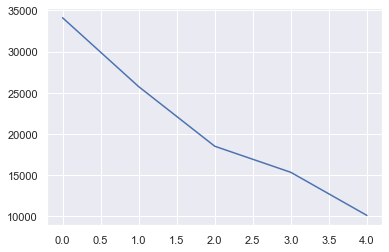

In [29]:
plt.plot(ddff.bin, ddff.totalLength)

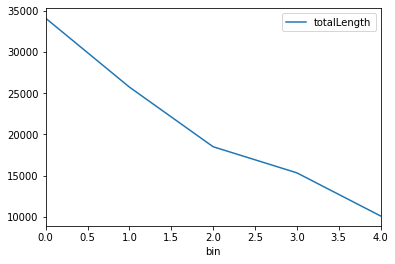

In [34]:
ddff.plot(x='bin', y='totalLength')

##  1.2) Plot the graphs for behaviors with only ONE animal:

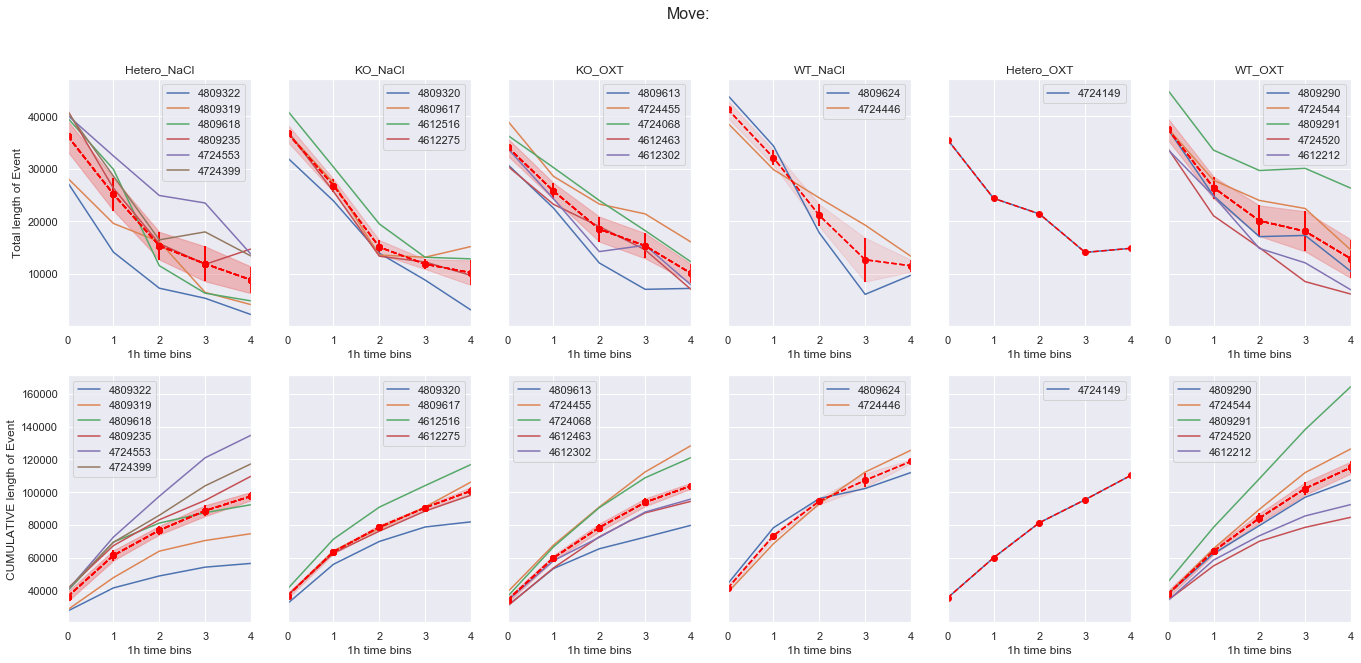

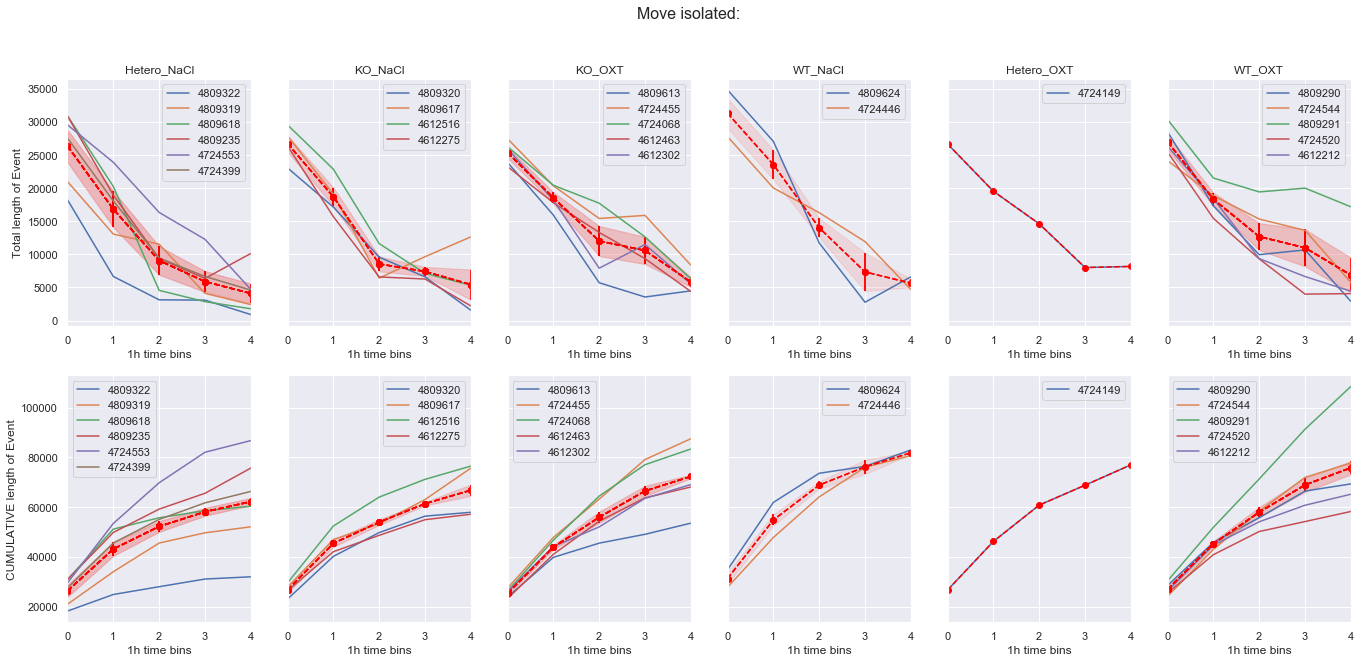

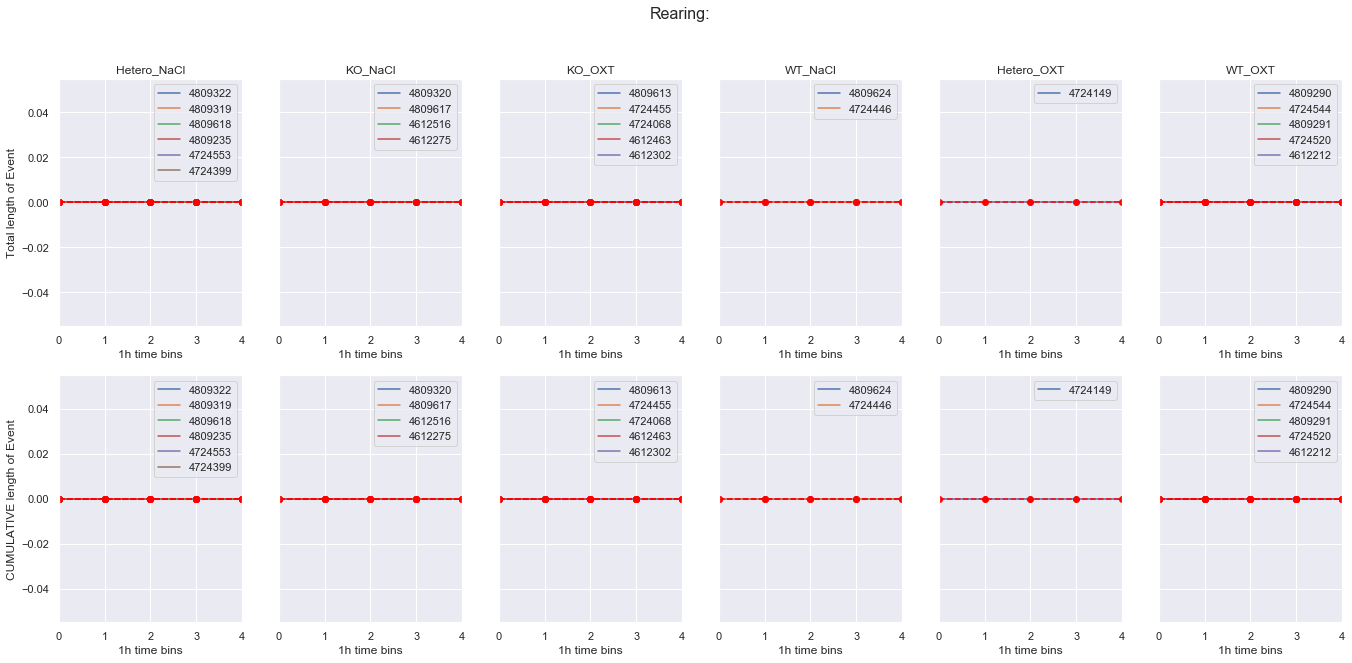

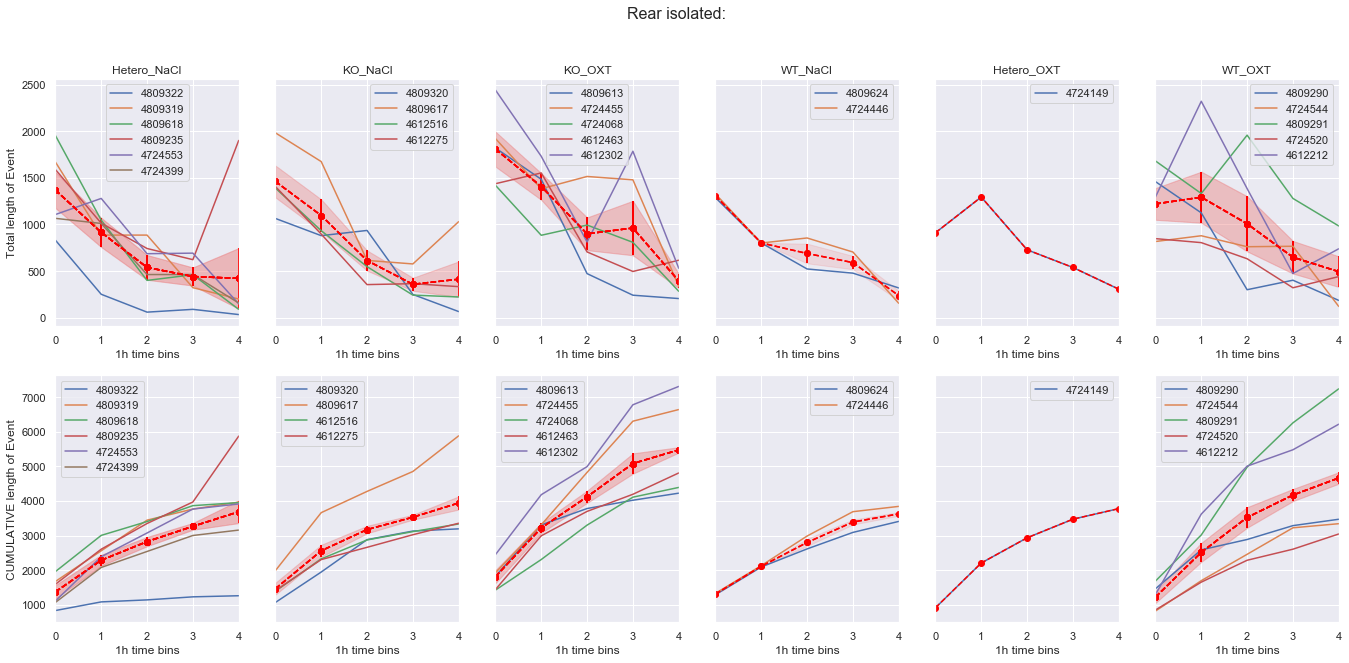

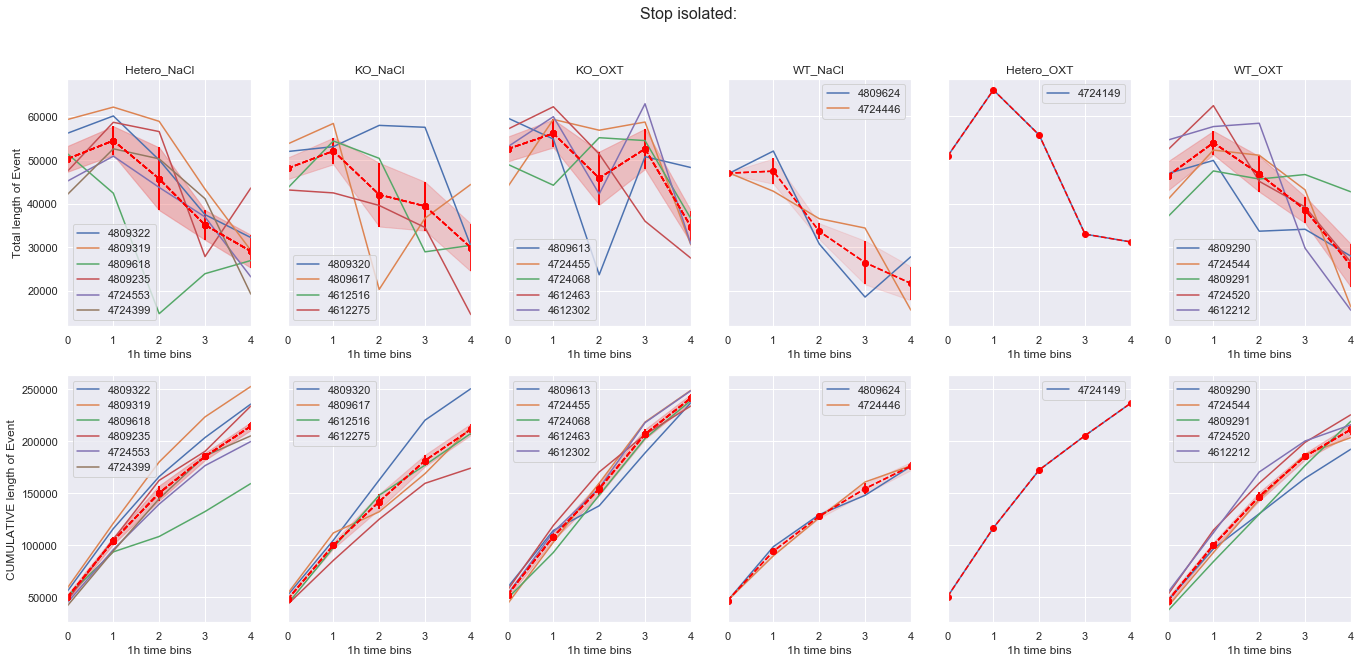

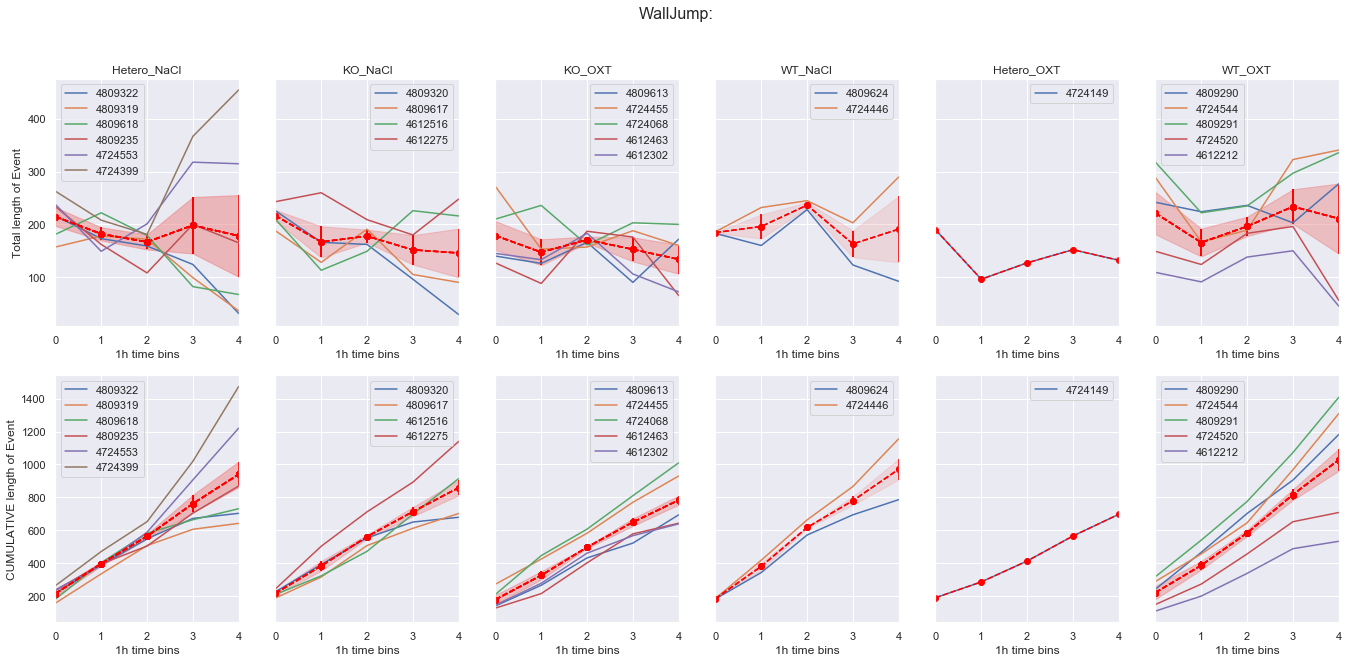

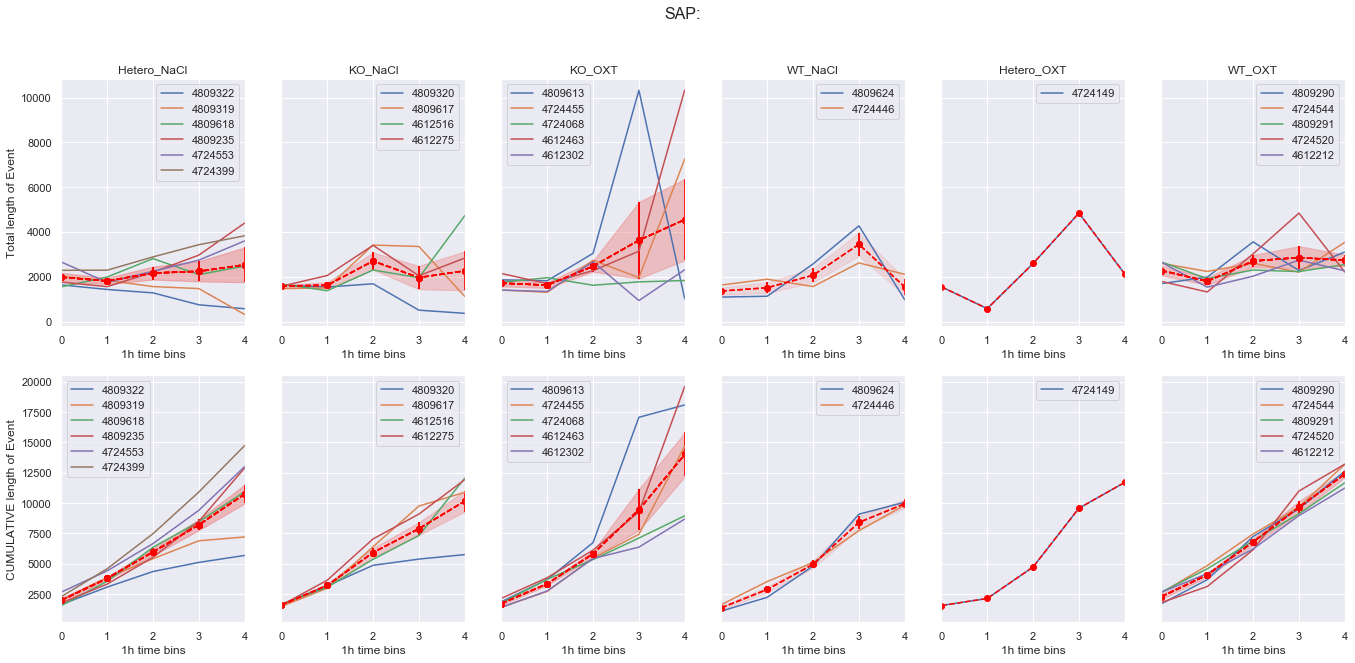

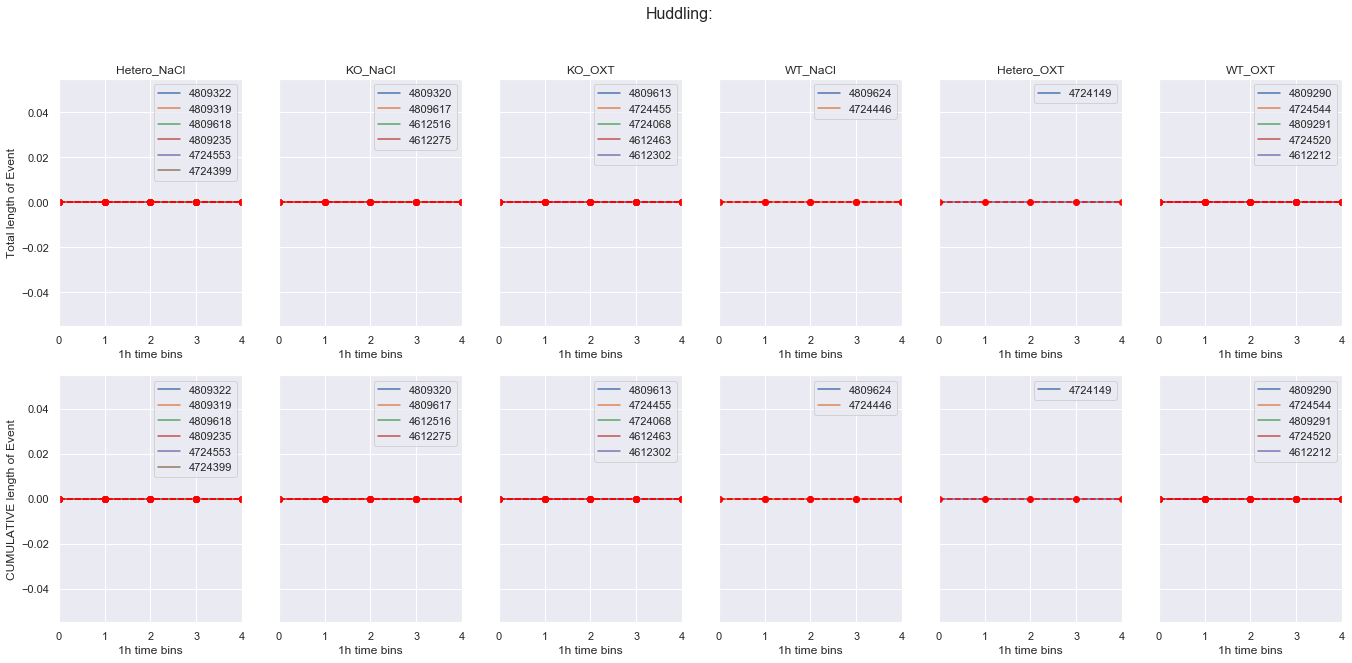

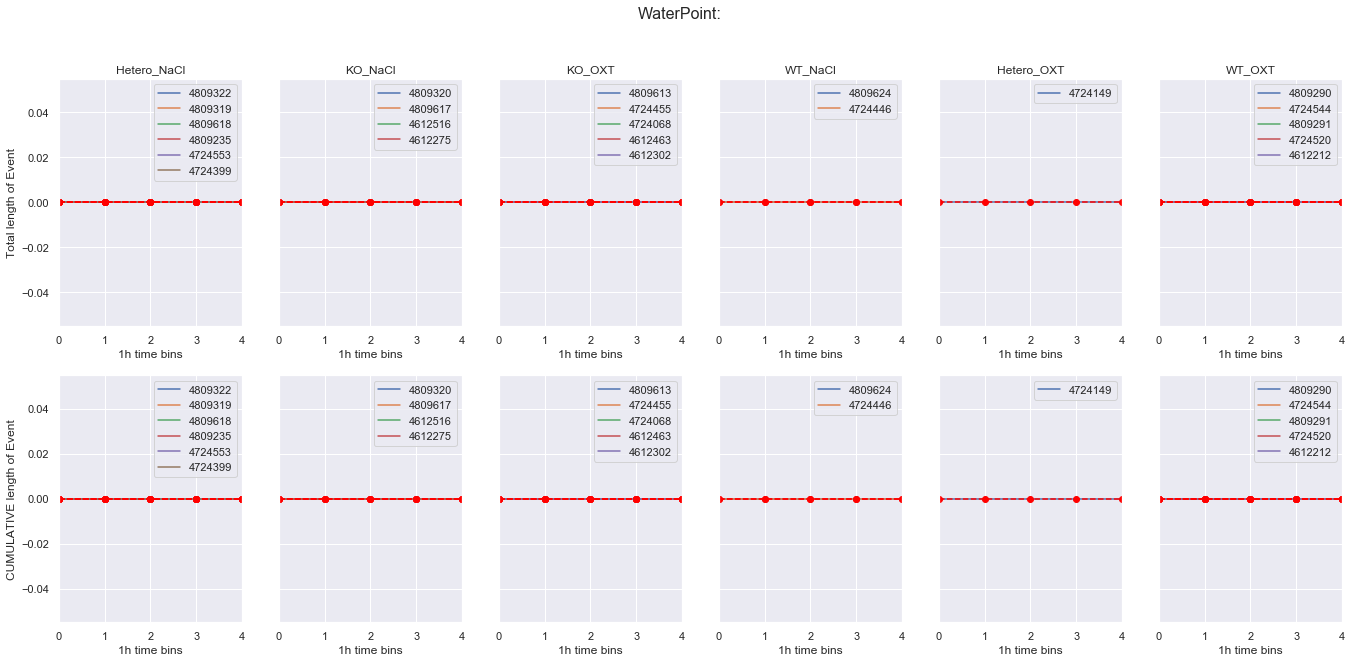

In [30]:
#Plot the data OF INDIVIDUALS MICE for the Different Genotypes using the groupby dataframe:

for beh in dfOne['name'].unique():
#     print(beh)
    fig, ax = plt.subplots(nrows=2,ncols=6,sharey='row',figsize=(23,10)) #Create a figure with 2 rows and 6 columns of subplots
    fig.suptitle(f"{beh}:" , fontsize=16)
    
    count = 0
    for geno in dfOne['GenoA'].unique():
#         print(geno)
        for rf in dfOne[(dfOne['name']==beh) & (dfOne['GenoA']==geno)]['RFidA'].unique():
            df_grouped = dfOne.groupby(['name','GenoA'], as_index=False).get_group((beh,geno)) #Define the Groupby dataframe
            
            ### Calculate the x, y, and SEM of the average trace of TotalLength
            x = df_grouped.groupby('bin')['bin'].mean()
            y = df_grouped.groupby('bin')['totalLength'].mean()
            std = df_grouped.groupby('bin')['totalLength'].std()
            sem = std/math.sqrt(len(std))
            
            df_grouped[df_grouped['RFidA']==rf].plot(x='bin', y='totalLength', label=rf, ax=ax[0,count]) # PLOT Total Length
            ax[0,count].errorbar(x,y,sem, linestyle='--', marker='o', color = 'red') #Plot The Average
            ax[0,count].fill_between(x, y-sem, y+sem, color='lightcoral', alpha=0.1) #Plot the SEM of the average
            
            ### Calculate the x, y, and SEM of the average trace of CUMULATIVE TotalLength
            x_cum = df_grouped.groupby('bin')['bin'].mean()
            y_cum = df_grouped.groupby('bin')['totalLength_cum'].mean()
            std_cum = df_grouped.groupby('bin')['totalLength_cum'].std()
            sem_cum = std/math.sqrt(len(std))
            
            df_grouped[df_grouped['RFidA']==rf].plot(x='bin', y='totalLength_cum', label=rf, ax=ax[1,count]) # Plot Cumulative Length
            ax[1,count].errorbar(x_cum,y_cum,sem_cum, linestyle='--', marker='o', color = 'red') #Plot The Average
            ax[1,count].fill_between(x_cum, y_cum-sem_cum, y_cum+sem_cum, color='lightcoral', alpha=0.1) #Plot the SEM of the average
            
            ax[0,count].set_xlabel('1h time bins')
            ax[0,count].set_title(geno)
            ax[1,count].set_xlabel('1h time bins')
        plt.xticks(np.arange(0,5,step=1)) #x-axis with 0 to 4 bins
        ax[0,0].set_ylabel('Total length of Event') #Y-axis label on left graph
        ax[1,0].set_ylabel('CUMULATIVE length of Event')
        
        count += 1
        
    plt.show() #Dsiplay the figure
    fig.savefig(f"Hab_1h-bins_{beh}_individuals.png", dpi=100) # SAVE A .PNG FIGURE

## 1.3) Plot the behaviors by genotypes:

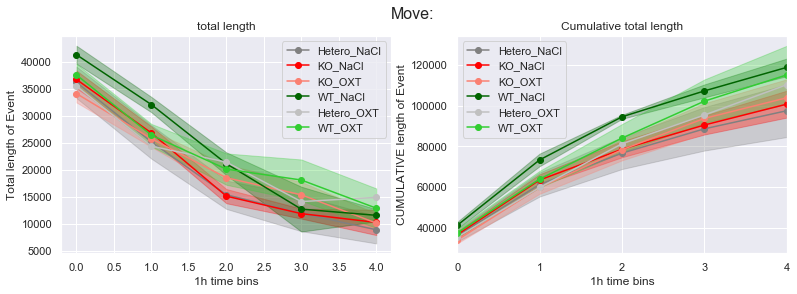

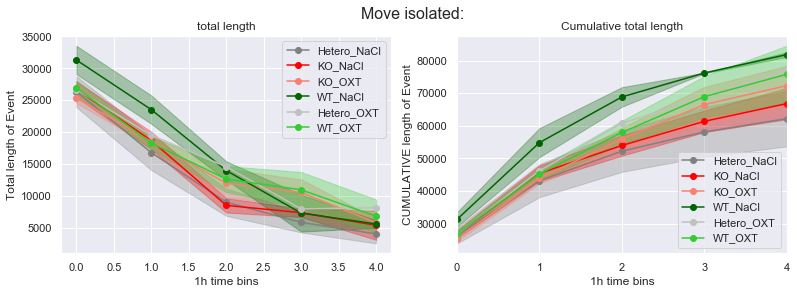

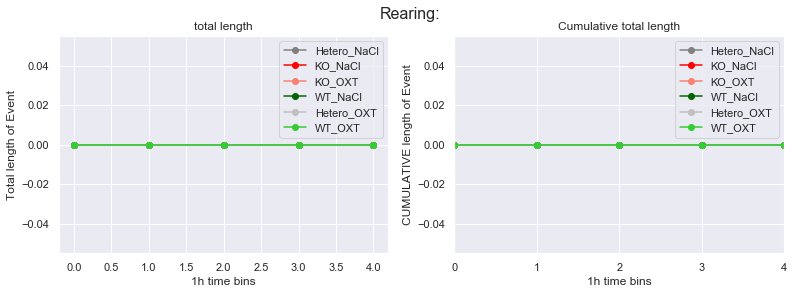

KeyboardInterrupt: 

In [79]:
#Plot the data of GROUPED genotypes using the DOUBLE groupby dataframe:
#dfOne.groupby(['name','GenoA'], as_index=False).get_group(('Move','KO_OXT')).groupby(['bin'], as_index=False)['totalLength'].mean()

dfGrouped = dfOne.groupby(['name','GenoA'], as_index=False)
dfGrouped.get_group(('Move','KO_OXT')).groupby(['bin'], as_index=False)['totalLength'].mean()

for beh in dfOne['name'].unique():
#     print(beh)
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(13,4)) #Create a figure with 1 row and 2 columns of subplots
    fig.suptitle(f"{beh}:" , fontsize=16)
    
    for geno in dfOne['GenoA'].unique():
#         print(geno)
        if "WT" in geno:
            color = "limegreen" if ("OXT" in geno) else "darkgreen"
        if "KO" in geno:
            color = "salmon" if ("OXT" in geno) else "red"
        if "Hetero" in geno:
            color = "silver" if ("OXT" in geno) else "grey"
        
        x = dfGrouped.get_group((beh,geno)).groupby(['bin'], as_index=False)['bin'].mean() #x-axis bins
        
        df_totalLen = dfGrouped.get_group((beh,geno)).groupby(['bin'])['totalLength'].mean()
        df_totalLen_std = dfGrouped.get_group((beh,geno)).groupby(['bin'])['totalLength'].std()
        df_totalLen_sem = df_totalLen_std / math.sqrt(len(df_totalLen_std))
        
        ax[0].plot(df_totalLen.index, df_totalLen, color=color, marker='o', label=geno) #plot totalLength
#         ax[0].errorbar(x,df_totalLen,df_totalLen_sem, marker='o', color = color) #Plot The Average
        ax[0].fill_between(x,df_totalLen-df_totalLen_sem, df_totalLen+df_totalLen_sem, color=color, alpha=0.3) #Plot the SEM of the average
        ax[0].legend()
        ax[0].set_xlabel('1h time bins')
        ax[0].set_title("total length")
        ax[0].set_ylabel('Total length of Event') #Y-axis label on left graph

        
        df_totalLen_cum = dfGrouped.get_group((beh,geno)).groupby(['bin'])['totalLength_cum'].mean()
        df_totalLen_cum_std = dfGrouped.get_group((beh,geno)).groupby(['bin'])['totalLength_cum'].std()
        df_totalLen_cum_sem = df_totalLen_cum_std / math.sqrt(len(df_totalLen_cum_std))

        df_totalLen_cum.plot(x='bin', y='totalLength_cum', color=color, marker='o', label=geno, ax=ax[1]) #plot Cumulative Length
#         ax[1].errorbar(x,df_totalLen_cum,df_totalLen_cum_sem, marker='o', color = color) #Plot The Average
        ax[1].fill_between(x,df_totalLen_cum-df_totalLen_cum_sem, df_totalLen_cum+df_totalLen_cum_sem, color=color, alpha=0.3) #Plot the SEM of the average
        ax[1].set_xlabel('1h time bins')
        ax[1].legend()
        ax[1].set_title("Cumulative total length")
        ax[1].set_ylabel('CUMULATIVE length of Event')
        
        plt.xticks(np.arange(0,5,step=1)) #x-axis with 0 to 4 bins
                
    plt.show() #Display the figure
    fig.savefig(f"Hab_1h-bins_{beh}_Groups.png", dpi=100) # SAVE A .PNG FIGURE

In [32]:
df_totalLen

bin
0    0
1    0
2    0
3    0
4    0
Name: totalLength, dtype: int64

## Plot for individual data... (not so usefull ? Looks bad!!)

In [ ]:
#Plot the data OF INDIVIDUALS MICE for the Different Genotypes using the groupby dataframe:
df_temp = dfOne.groupby(['name','GenoA'])

def colorChoice(geno):
    if "WT" in geno:
        color = "limegreen" if ("OXT" in geno) else "darkgreen"
    if "KO" in geno:
        color = "salmon" if ("OXT" in geno) else "red"
    if "Hetero" in geno:
        color = "silver" if ("OXT" in geno) else "grey"
    return color

for beh in dfOne['name'].unique():
#     print(beh)
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,5)) #Create a figure with 1 rows and 2 columns of subplots
    fig.suptitle(f"{beh}:" , fontsize=14)
    
    for geno in dfOne['GenoA'].unique():
#         print(geno)
        color = colorChoice(geno)
        df_temp.get_group((beh,geno)).plot(kind = 'scatter', x='bin', y='totalLength', 
                                           label=geno, c=color, ax=ax[0])
        
        df_temp.get_group((beh,geno)).plot(kind = 'scatter',x='bin', y='totalLength_cum', 
                                           label=geno, c=color, ax=ax[1])
        
        ax[0].set_xticks(np.arange(0,5,step=1))
        ax[1].set_xticks(np.arange(0,5,step=1))
        
        ax[0].set_xlabel('1h time bins')
        ax[1].set_xlabel('1h time bins')
        
        ax[0].set_ylabel('Total length of Event') #Y-axis labels
        ax[1].set_ylabel('CUMULATIVE length of Event')

    plt.show() #Display the figure
    
    # SAVE A .PNG FIGURE:
    fig.savefig(f"Hab_1h-bins_{beh}_Grouped.png", dpi=100) 

# 2) Behaviors with Two animals:

## 2.1) Define the dfTwo and calculate the cumulative sum of behaviros 

In [34]:
df.name.unique()

array(['Move', 'Move isolated', 'Rearing', 'Rear isolated',
       'Stop isolated', 'WallJump', 'SAP', 'Huddling', 'WaterPoint',
       'Contact', 'Oral-oral Contact', 'Oral-genital Contact',
       'Side by side Contact', 'Side by side Contact, opposite way',
       'Social approach', 'Social escape', 'Approach contact',
       'Approach rear', 'Break contact', 'Get away',
       'FollowZone Isolated', 'Train2', 'Group2', 'Group3', 'Group4',
       'Nest4'], dtype=object)

In [35]:
#Create a dataframe "dfTwo" with the behaviors involving TWO animals!
behaviorsTwo = ['Contact', 'Oral-oral Contact', 'Oral-genital Contact','Side by side Contact', 
                'Side by side Contact, opposite way','Social approach', 'Social escape', 'Approach contact',
                'Approach rear', 'Break contact', 'Get away','FollowZone Isolated', 'Train2', 'Group2']
dfTwo = df[df['name'].isin(behaviorsTwo)] #Create the dataframe from the main DF
dfTwo = dfTwo.drop(columns=["idC", "idD","GenoC","GenoD",'RFidC','RFidD']) #Removes useless columns
dfTwo

Date   Cage Session  bin  start_frame  stop_frame     name  idA  idB  \
27    190812  Cage3    Hab1    0         2000      110000  Contact    1  3.0   
28    190812  Cage3    Hab1    0         2000      110000  Contact    1  2.0   
29    190812  Cage3    Hab1    0         2000      110000  Contact    3  1.0   
30    190812  Cage3    Hab1    0         2000      110000  Contact    3  2.0   
31    190812  Cage3    Hab1    0         2000      110000  Contact    2  1.0   
...      ...    ...     ...  ...          ...         ...      ...  ...  ...   
7408  190911  Cage6    Hab1    4       434000      542000   Group2    2  3.0   
7409  190911  Cage6    Hab1    4       434000      542000   Group2    2  4.0   
7410  190911  Cage6    Hab1    4       434000      542000   Group2    4  1.0   
7411  190911  Cage6    Hab1    4       434000      542000   Group2    4  3.0   
7412  190911  Cage6    Hab1    4       434000      542000   Group2    4  2.0   

        RFidA      RFidB        GenoA        GenoB  totalLength  meanLength  \
27    4809322  4809319.0  Hetero_NaCl  Hetero_NaCl        14421   28.166016   
28    4809322  4809320.0  Hetero_NaCl      KO_NaCl        19239   30.831731   
29    4809319  4809322.0  Hetero_NaCl  Hetero_NaCl        14421   28.166016   
30    4809319  4809320.0  Hetero_NaCl      KO_NaCl        14134   24.580870   
31    4809320  4809322.0      KO_NaCl  Hetero_NaCl        19239   30.831731   
...       ...        ...          ...          ...          ...         ...   
7408  4724520  4612302.0       WT_OXT       KO_OXT         2872   20.661871   
7409  4724520  4612212.0       WT_OXT       WT_OXT         4780   40.508475   
7410  4612212  4612463.0       WT_OXT       KO_OXT         4082   32.919355   
7411  4612212  4612302.0       WT_OXT       KO_OXT         4488   21.270142   
7412  4612212  4724520.0       WT_OXT       WT_OXT         4780   40.508475   

      medianLength  numberOfEvents   stdLength   CI95_low    CI95_up  
27             6.0             512   52.288280  23.636774  32.695257  
28             6.0             624   58.729379  26.223660  35.439802  
29             6.0             512   52.288280  23.636774  32.695257  
30             6.0             575   46.812001  20.754567  28.407173  
31             6.0             624   58.729379  26.223660  35.439802  
...            ...             ...         ...        ...        ...  
7408           3.0             139   58.554476  10.927480  30.396261  
7409           4.0             118  143.198969  14.670709  66.346241  
7410           2.5             124   87.999322  17.430313  48.408397  
7411           2.0             211   65.867007  12.382578  30.157707  
7412           4.0             118  143.198969  14.670709  66.346241  

[4620 rows x 20 columns]

In [37]:
# ADD VISUAL TIMER OF DATAFRAME WORK :)
#Adds the Cumulative length of totalLength and meanLength of the 'dfOne' Dataframe 

behaviors = dfTwo.name.unique()
rfidAs = dfTwo.RFidA.unique()
rfidBs = dfTwo.RFidB.unique()

with tqdm_notebook(total=behaviors.shape[0]*rfidAs.shape[0]*rfidBs.shape[0]) as t:
    for beh in behaviors:
        for rfid1 in rfidAs:
            for rfid2 in rfidBs:
                cond = (dfTwo.name==beh) & (dfTwo.RFidA==rfid1) & (dfTwo.RFidB==rfid2)
                dfTwo.loc[cond, "totalLength_cum"] = dfTwo.loc[cond, "totalLength"].cumsum()
                dfTwo.loc[cond, "meanLength_cum"] = dfTwo.loc[cond, "meanLength"].cumsum()
                t.update()

In [38]:
condi = (dfTwo.name=='Contact') & (dfTwo.RFidA==4809322) & (dfTwo.RFidB==4809320)
dfTwo.loc[condi, "totalLength_cum"] = dfTwo.loc[condi, "totalLength"].cumsum()
dfTwo.loc[condi]

Date   Cage Session  bin  start_frame  stop_frame     name  idA  idB  \
28   190812  Cage3    Hab1    0         2000      110000  Contact    1  2.0   
145  190812  Cage3    Hab1    1       110000      218000  Contact    1  2.0   
262  190812  Cage3    Hab1    2       218000      326000  Contact    1  2.0   
379  190812  Cage3    Hab1    3       326000      434000  Contact    1  2.0   
496  190812  Cage3    Hab1    4       434000      542000  Contact    1  2.0   

       RFidA  ...    GenoB totalLength meanLength  medianLength  \
28   4809322  ...  KO_NaCl       19239  30.831731           6.0   
145  4809322  ...  KO_NaCl       22142  35.370607           5.0   
262  4809322  ...  KO_NaCl       23189  33.032764           3.0   
379  4809322  ...  KO_NaCl       17938  79.724444           4.0   
496  4809322  ...  KO_NaCl       19519  63.168285           2.0   

     numberOfEvents   stdLength   CI95_low     CI95_up  totalLength_cum  \
28              624   58.729379  26.223660   35.439802          19239.0   
145             626   79.942392  29.108132   41.633083          41381.0   
262             702  116.709823  24.399104   41.666423          64570.0   
379             225  342.181543  35.012723  124.436166          82508.0   
496             309  448.493989  13.160979  113.175591         102027.0   

     meanLength_cum  
28        30.831731  
145       66.202338  
262       99.235101  
379      178.959546  
496      242.127831  

[5 rows x 22 columns]

In [39]:
#Show an exmaple and Sort the data TO CONTROL IF THE CUMULATIVE SUM IS CORRECT !!!
dfTwo[(dfTwo['name']=='Contact')&(dfTwo['GenoA']=="KO_OXT")].sort_values(['RFidA', 'RFidB','bin'])

Date   Cage Session  bin  start_frame  stop_frame     name  idA  idB  \
6146  190911  Cage6    Hab1    0         2000      110000  Contact    3  4.0   
6422  190911  Cage6    Hab1    1       110000      218000  Contact    3  4.0   
6698  190911  Cage6    Hab1    2       218000      326000  Contact    3  4.0   
6974  190911  Cage6    Hab1    3       326000      434000  Contact    3  4.0   
7250  190911  Cage6    Hab1    4       434000      542000  Contact    3  4.0   
...      ...    ...     ...  ...          ...         ...      ...  ...  ...   
629   190813  Cage1    Hab1    0         2000      110000  Contact    3  1.0   
905   190813  Cage1    Hab1    1       110000      218000  Contact    3  1.0   
1181  190813  Cage1    Hab1    2       218000      326000  Contact    3  1.0   
1457  190813  Cage1    Hab1    3       326000      434000  Contact    3  1.0   
1733  190813  Cage1    Hab1    4       434000      542000  Contact    3  1.0   

        RFidA  ...    GenoB totalLength meanLength  medianLength  \
6146  4612302  ...   WT_OXT        9392  20.732892           4.0   
6422  4612302  ...   WT_OXT       14829  28.682785           4.0   
6698  4612302  ...   WT_OXT       20768  29.209564           3.0   
6974  4612302  ...   WT_OXT       12691  30.878345           2.0   
7250  4612302  ...   WT_OXT       12292  33.043011           2.0   
...       ...  ...      ...         ...        ...           ...   
629   4809613  ...  WT_NaCl       10360  23.545455           6.0   
905   4809613  ...  WT_NaCl       12043  21.165202           4.0   
1181  4809613  ...  WT_NaCl       22564  24.822882           2.0   
1457  4809613  ...  WT_NaCl       21293  63.561194           3.0   
1733  4809613  ...  WT_NaCl        8552  18.672489           2.0   

      numberOfEvents   stdLength   CI95_low    CI95_up  totalLength_cum  \
6146             453   35.397543  17.473173  23.992610           9392.0   
6422             517   71.380122  22.529769  34.835802          24221.0   
6698             711   84.121971  23.026116  35.393012          44989.0   
6974             411   95.690345  21.627034  40.129657          57680.0   
7250             372  118.668456  20.983772  45.102249          69972.0   
...              ...         ...        ...        ...              ...   
629              440   43.343530  19.495464  27.595445          10360.0   
905              569   45.907458  17.393102  24.937302          22403.0   
1181             909   63.732013  20.679722  28.966043          44967.0   
1457             335  159.090836  46.524755  80.597633          66260.0   
1733             458   49.823288  14.109434  23.235544          74812.0   

      meanLength_cum  
6146       20.732892  
6422       49.415677  
6698       78.625241  
6974      109.503587  
7250      142.546597  
...              ...  
629        23.545455  
905        44.710657  
1181       69.533539  
1457      133.094733  
1733      151.767222  

[75 rows x 22 columns]

In [40]:
#Group data, select a sub-group and display only few columns :
grouped = dfTwo.groupby(['name','GenoA'])
columnsToShow = ['name', 'bin','RFidA', 'RFidB',  'totalLength', 'totalLength_cum', 'meanLength', 'meanLength_cum']
grouped.get_group(('Contact','KO_OXT')).sort_values(['RFidA', 'RFidB','bin'])[columnsToShow]

name  bin    RFidA      RFidB  totalLength  totalLength_cum  \
6146  Contact    0  4612302  4612212.0         9392           9392.0   
6422  Contact    1  4612302  4612212.0        14829          24221.0   
6698  Contact    2  4612302  4612212.0        20768          44989.0   
6974  Contact    3  4612302  4612212.0        12691          57680.0   
7250  Contact    4  4612302  4612212.0        12292          69972.0   
...       ...  ...      ...        ...          ...              ...   
629   Contact    0  4809613  4809624.0        10360          10360.0   
905   Contact    1  4809613  4809624.0        12043          22403.0   
1181  Contact    2  4809613  4809624.0        22564          44967.0   
1457  Contact    3  4809613  4809624.0        21293          66260.0   
1733  Contact    4  4809613  4809624.0         8552          74812.0   

      meanLength  meanLength_cum  
6146   20.732892       20.732892  
6422   28.682785       49.415677  
6698   29.209564       78.625241  
6974   30.878345      109.503587  
7250   33.043011      142.546597  
...          ...             ...  
629    23.545455       23.545455  
905    21.165202       44.710657  
1181   24.822882       69.533539  
1457   63.561194      133.094733  
1733   18.672489      151.767222  

[75 rows x 8 columns]

## 2.2) Plot individual data for each mouse of different genotypes + The Average and SEM:

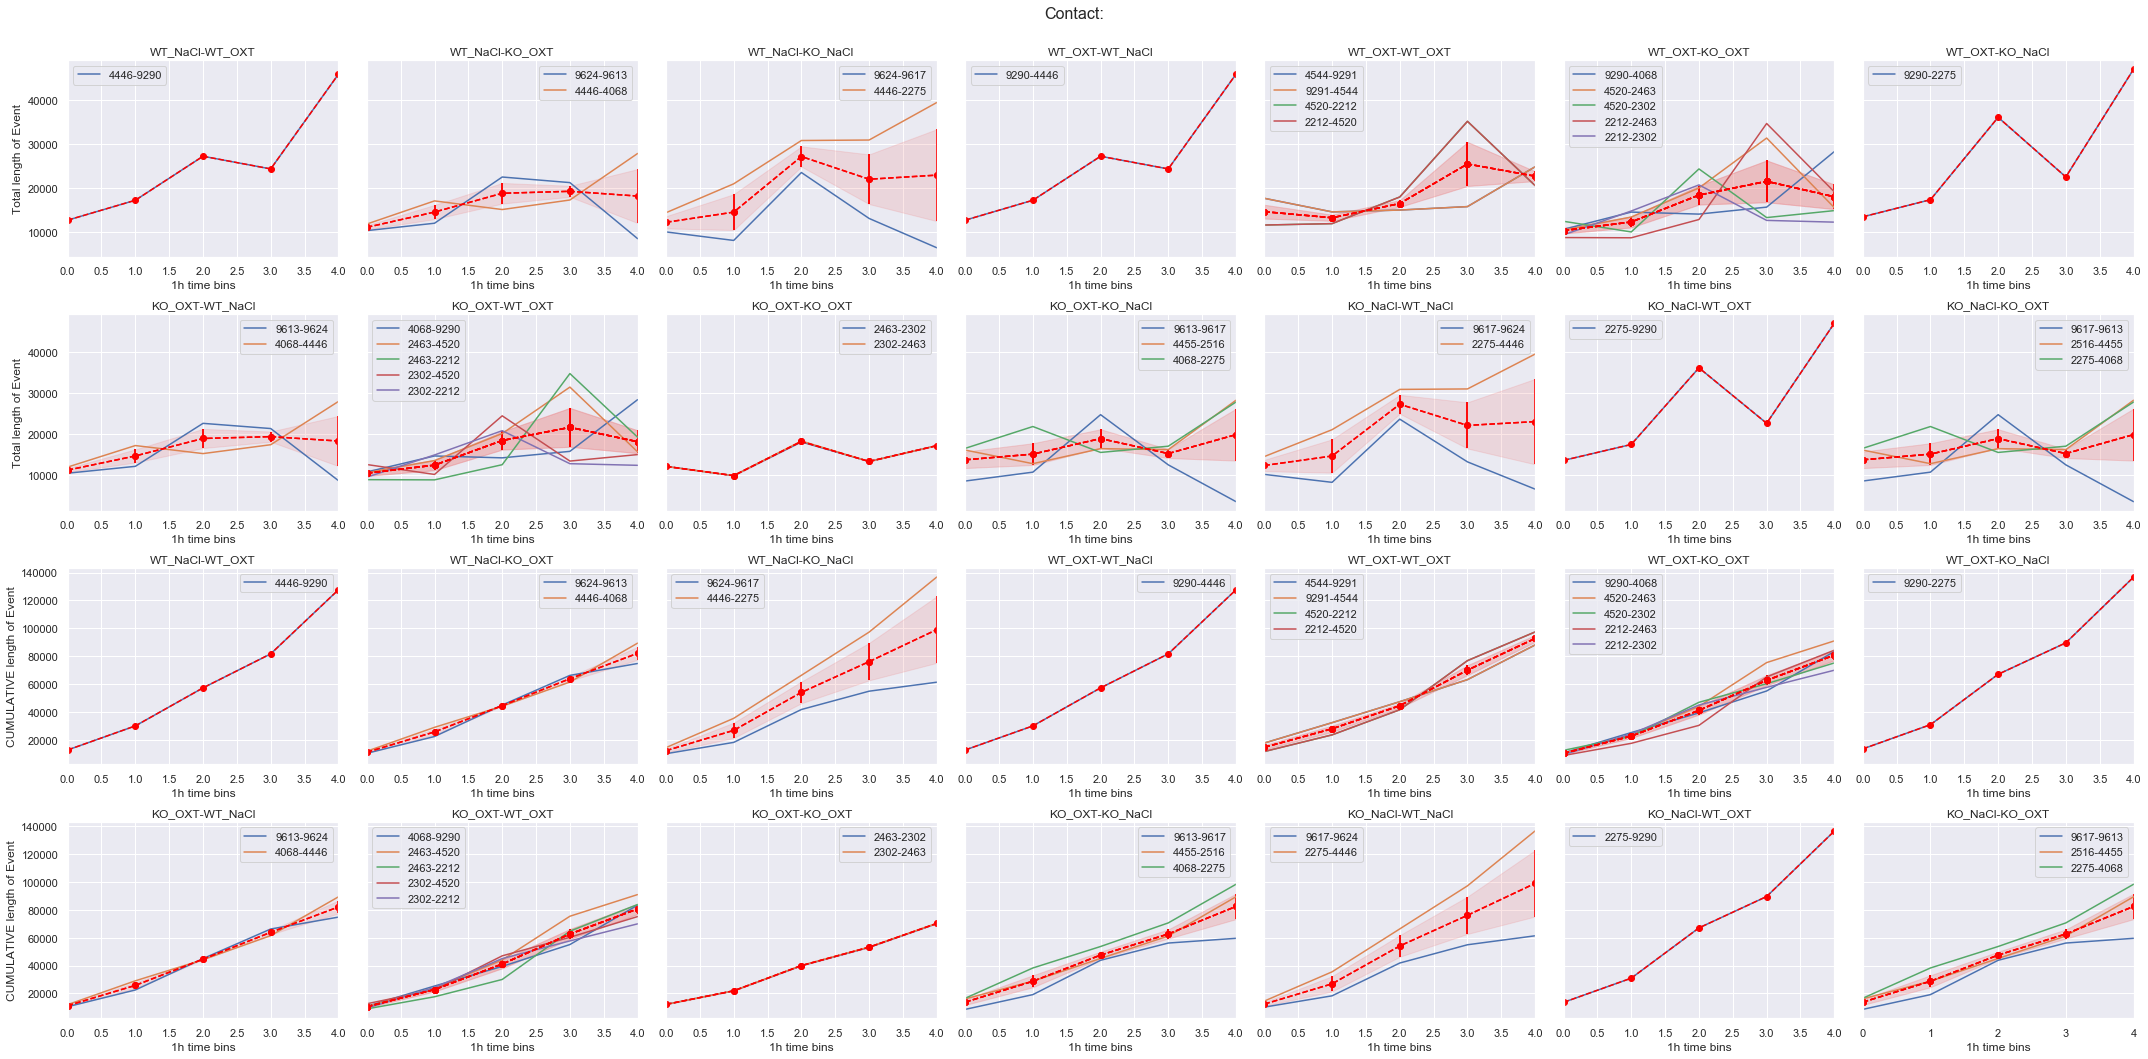

KeyboardInterrupt: 

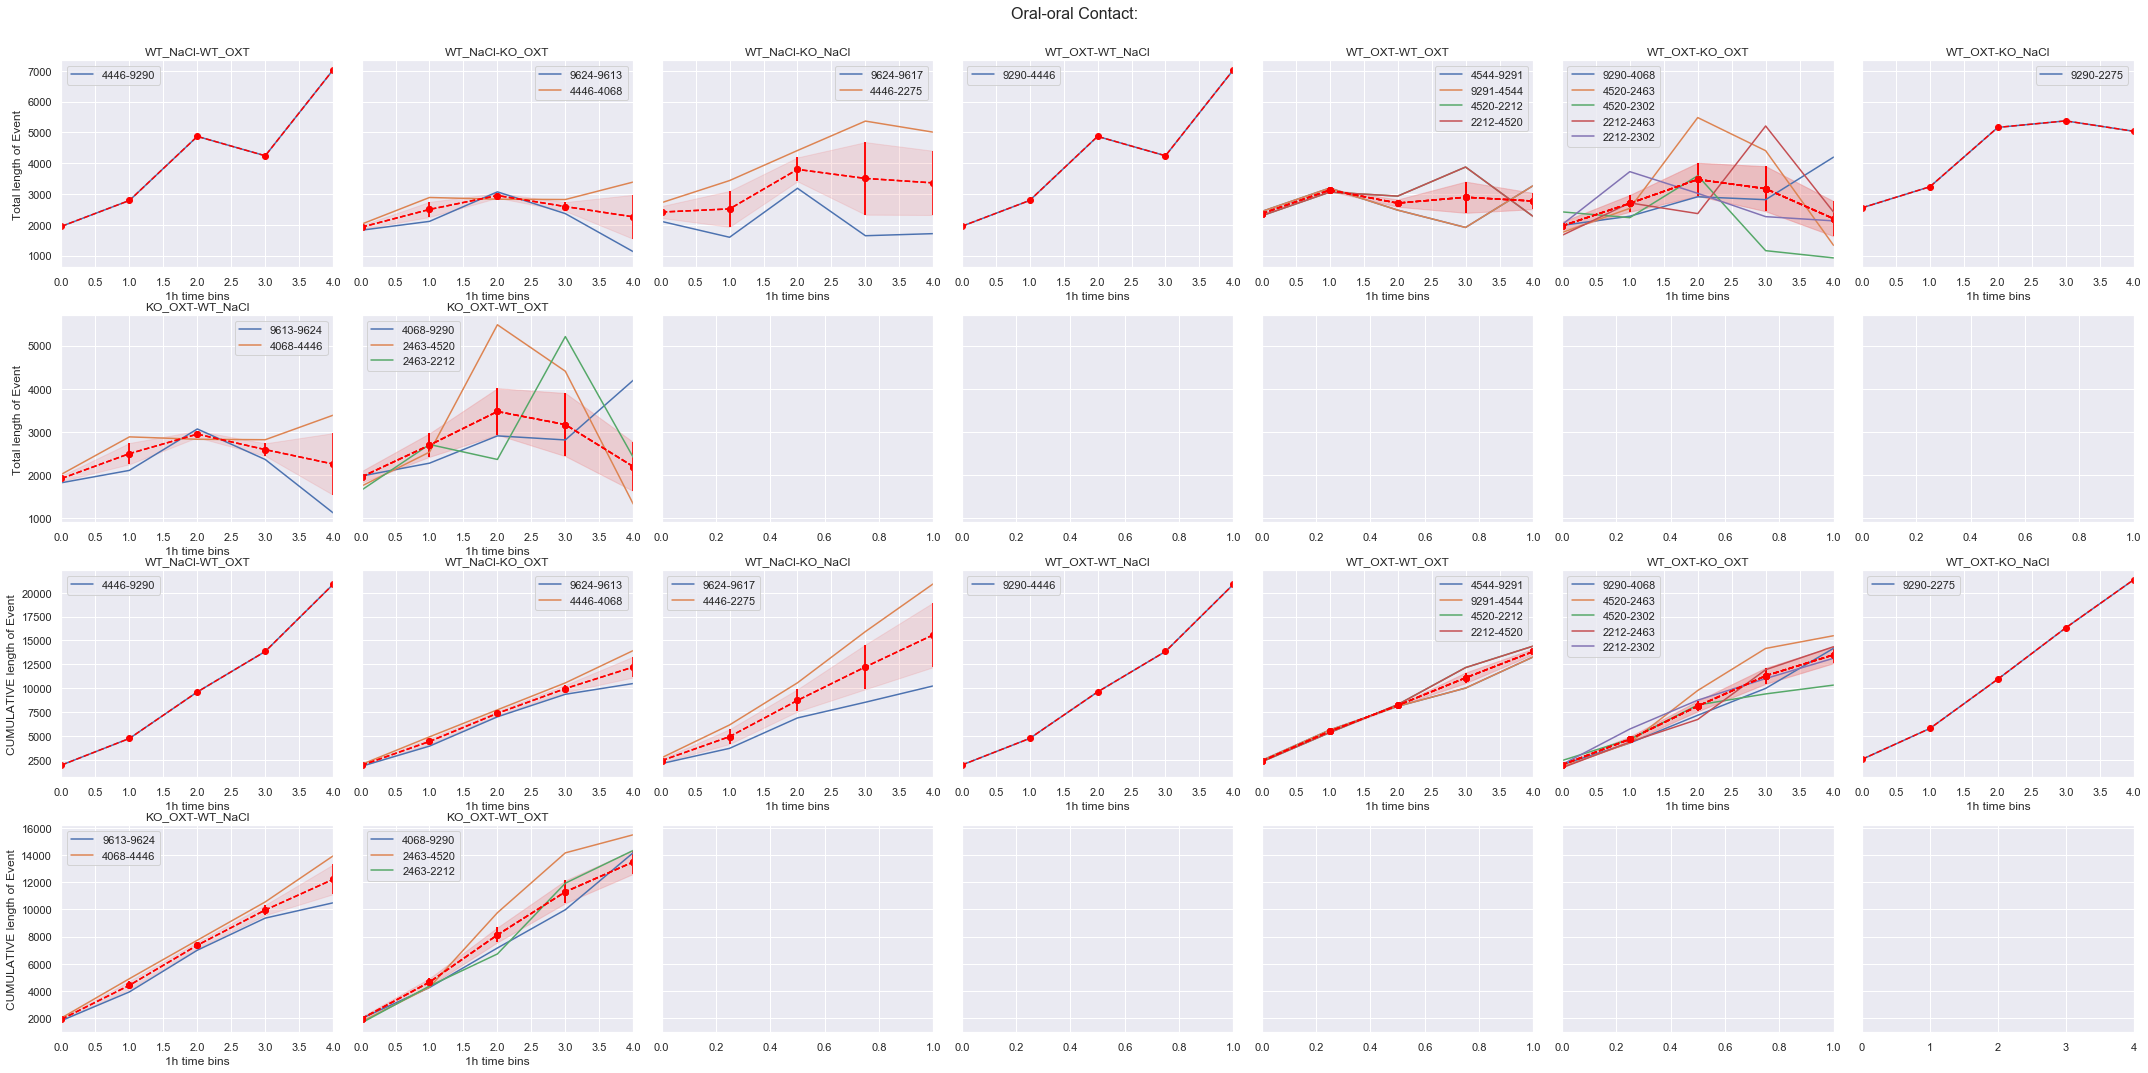

In [130]:
#Plot the data OF INDIVIDUALS MICE for the Different Genotypes using the groupby dataframe:

genotypes = ["WT_NaCl", "WT_OXT", "KO_OXT", "KO_NaCl"] #Do not plot Hetero mice

for beh in dfTwo['name'].unique():
#     print(beh)

    fig, ax = plt.subplots(nrows=4,ncols=7,sharey='row',figsize=(30,15)) #Create a figure with 2 rows and 6 columns of subplots
    countGraph = 0

    for geno1 in genotypes:
        for geno2 in genotypes:
            #Define the selection Condition over Behavior, Genotype-animalA and Genotype-animalB:
            beh_geno1_geno2 = (dfTwo['name']==beh) & (dfTwo['GenoA']==geno1) & (dfTwo['GenoB']==geno2) 

            #Define the Groupby dataframe:
            if len(dfTwo[(dfTwo['GenoA']==geno1) & (dfTwo['GenoB']==geno2)]) == 0:#NO Geno1-Geno2 match
#                 print(f"No match between {geno1} and {geno2}")
                continue  
            df_grouped = dfTwo.groupby(['name','GenoA', 'GenoB'], as_index=False).get_group((beh,geno1, geno2)) #Define the Groupby dataframe

            for rf1 in dfTwo[beh_geno1_geno2]['RFidA'].unique():
                for rf2 in dfTwo[beh_geno1_geno2]['RFidB'].unique():
                    rf2 = int(rf2) #Makes sure rfid is an integer
                    if rf1 == rf2: # Skip Same ID
                        continue 
                    if len(df_grouped[(df_grouped['RFidA']==rf1) & (df_grouped['RFidB']==rf2)]) == 0:#NO RF1-RF2 match
                        continue   
#                     print(geno1, rf1, geno2, rf2)

                    ### Calculate the x, y, and SEM of the average trace of TotalLength
                    x = df_grouped.groupby('bin')['bin'].mean()
                    y = df_grouped.groupby('bin')['totalLength'].mean()
                    std = df_grouped.groupby('bin')['totalLength'].std()
                    sem = std/math.sqrt(len(std))

                    ### Calculate the x, y, and SEM of the average trace CUMULATIVE TotalLength
                    x_cum = df_grouped.groupby('bin')['bin'].mean()
                    y_cum = df_grouped.groupby('bin')['totalLength_cum'].mean()
                    std_cum = df_grouped.groupby('bin')['totalLength_cum'].std()
                    sem_cum = std_cum/math.sqrt(len(std_cum))

                    ### Plot the data and the averages (+ error bars)
                    rfid1_rfid2 = (df_grouped['RFidA']==rf1) & (df_grouped['RFidB']==rf2) #Select data with rfid1 and rfid2
                    if countGraph <= 6:
                        df_grouped[rfid1_rfid2].plot(x='bin', y='totalLength', label=f"{str(rf1)[3:]}-{str(rf2)[3:]}", 
                                              ax=ax[0,countGraph])
                        ax[0,countGraph].errorbar(x,y,sem, linestyle='--', marker='o', 
                                                  color = 'red') #Plot the Average
                        ax[0,countGraph].fill_between(x, y-sem, y+sem, color='lightcoral', 
                                                      alpha=0.1) #Plot SEM of average
                        ax[0,countGraph].set_xlabel('1h time bins') # x-axis label
                        ax[0,countGraph].set_title(f"{geno1}-{geno2}") #Title of the graph

                        df_grouped[rfid1_rfid2].plot(x='bin', y='totalLength_cum', label=f"{str(rf1)[3:]}-{str(rf2)[3:]}", 
                                              ax=ax[2,countGraph])
                        ax[2,countGraph].errorbar(x_cum,y_cum,sem_cum, linestyle='--', marker='o', 
                                                  color = 'red') #Plot the Average
                        ax[2,countGraph].fill_between(x_cum, y_cum-sem_cum, y_cum+sem_cum, color='lightcoral', 
                                                      alpha=0.1) #Plot SEM of average
                        ax[2,countGraph].set_xlabel('1h time bins') # x-axis label
                        ax[2,countGraph].set_title(f"{geno1}-{geno2}") #Title of the graph
                    if (countGraph <= 13) & (countGraph > 6):
                        df_grouped[rfid1_rfid2].plot(x='bin', y='totalLength', label=f"{str(rf1)[3:]}-{str(rf2)[3:]}", 
                                                     ax=ax[1,countGraph-7])
                        ax[1,countGraph-7].errorbar(x,y,sem, linestyle='--', marker='o', 
                                                    color = 'red') #Plot the Average
                        ax[1,countGraph-7].fill_between(x, y-sem, y+sem, color='lightcoral', 
                                                        alpha=0.1) #Plot SEM of average
                        ax[1,countGraph-7].set_xlabel('1h time bins') # X-axis name
                        ax[1,countGraph-7].set_title(f"{geno1}-{geno2}") #Title of the graph

                        df_grouped[rfid1_rfid2].plot(x='bin', y='totalLength_cum', label=f"{str(rf1)[3:]}-{str(rf2)[3:]}", 
                                              ax=ax[3,countGraph-7])
                        ax[3,countGraph-7].errorbar(x_cum,y_cum,sem_cum, linestyle='--', marker='o', 
                                                  color = 'red') #Plot the Average
                        ax[3,countGraph-7].fill_between(x_cum, y_cum-sem_cum, y_cum+sem_cum, color='lightcoral', 
                                                      alpha=0.1) #Plot SEM of average

                        ax[3,countGraph-7].set_xlabel('1h time bins')
                        ax[3,countGraph-7].set_title(f"{geno1}-{geno2}") #Title of the graph
                    if countGraph > 13:
                        print(">14!")

#                     ax[0,countGraph].set_xlabel('1h time bins')
#                     ax[0,countGraph].set_title(f"{geno1}-{geno2}")
#                     ax[1,countGraph].set_xlabel('1h time bins')

            countGraph += 1
#             print(countGraph)


        plt.xticks(np.arange(0,5,step=1)) #x-axis with 0 to 4 bins
        ax[0,0].set_ylabel('Total length of Event') #Y-axis label on left graph
        ax[1,0].set_ylabel('Total length of Event')
        ax[2,0].set_ylabel('CUMULATIVE length of Event') #Y-axis label on left graph
        ax[3,0].set_ylabel('CUMULATIVE length of Event')
        plt.tight_layout() #Display nicely the subgraphs (and fits the png size)
        fig.suptitle(f"{beh}:" , fontsize=16) #Tight layout does not include suptitle
        plt.subplots_adjust(top=0.93) #Adjust where the plots starts (Otherwise overlap with title)
    plt.show() #Display the figures
#     fig.savefig(f"Hab_1h-bins_{beh}_genoA-genoB.png", dpi=100) # SAVE A .PNG FIGURE


In [ ]:
dfTwo[(dfTwo['GenoA']==geno1) & (dfTwo['GenoB']==geno2)

## 2.3) Plot the average of each behavior, for each genotype and for each genotype-genotype interactions:


In [59]:
# df_temp = dfTwo.groupby(['name','GenoA', 'GenoB']).get_group(('Contact','KO_OXT', 'WT_OXT'))
# # df_temp

# cond = (dfTwo['name']==beh) & (dfTwo['GenoA']=='KO_OXT') & (dfTwo['GenoB']=='WT_OXT') 
# print(dfTwo[cond]['RFidA'].unique())
# print(dfTwo[cond]['RFidB'].unique())

[4724068 4612463 4612302]
[4809290. 4724520. 4612212.]


In [61]:
# dfTwo['name'].unique()

array(['Contact', 'Oral-oral Contact', 'Oral-genital Contact',
       'Side by side Contact', 'Side by side Contact, opposite way',
       'Social approach', 'Social escape', 'Approach contact',
       'Approach rear', 'Break contact', 'Get away',
       'FollowZone Isolated', 'Train2', 'Group2'], dtype=object)

### Insert the list of genotypes to analyze:

In [104]:
genotypes = ["WT_NaCl", "WT_OXT", "KO_OXT", "KO_NaCl"] #Do not plot Hetero mice

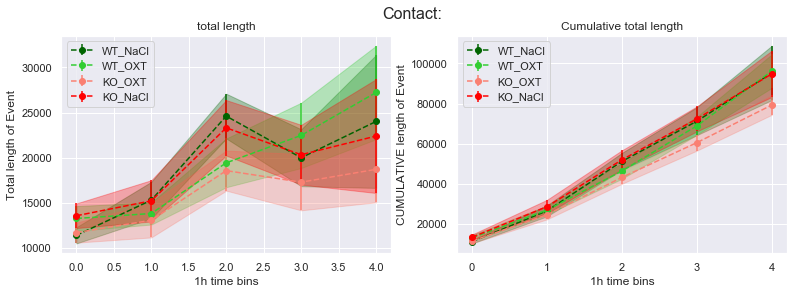

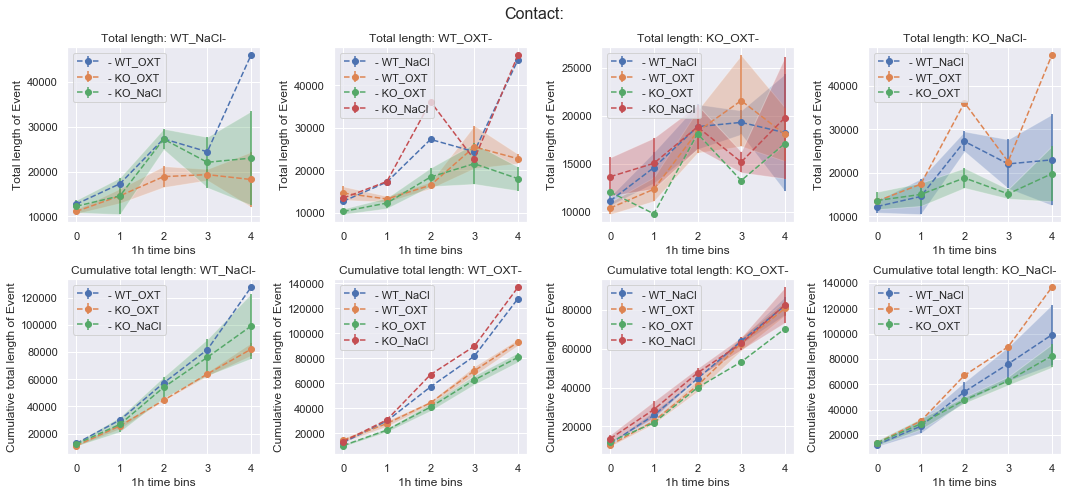

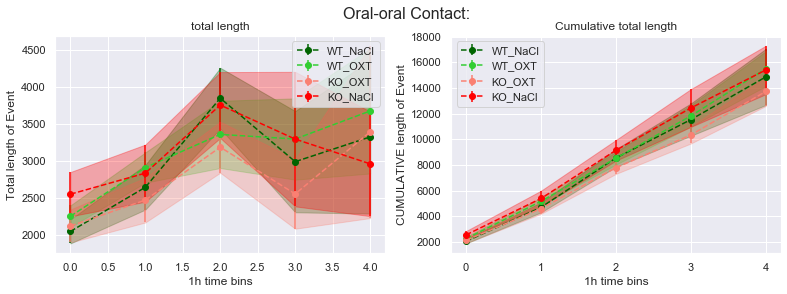

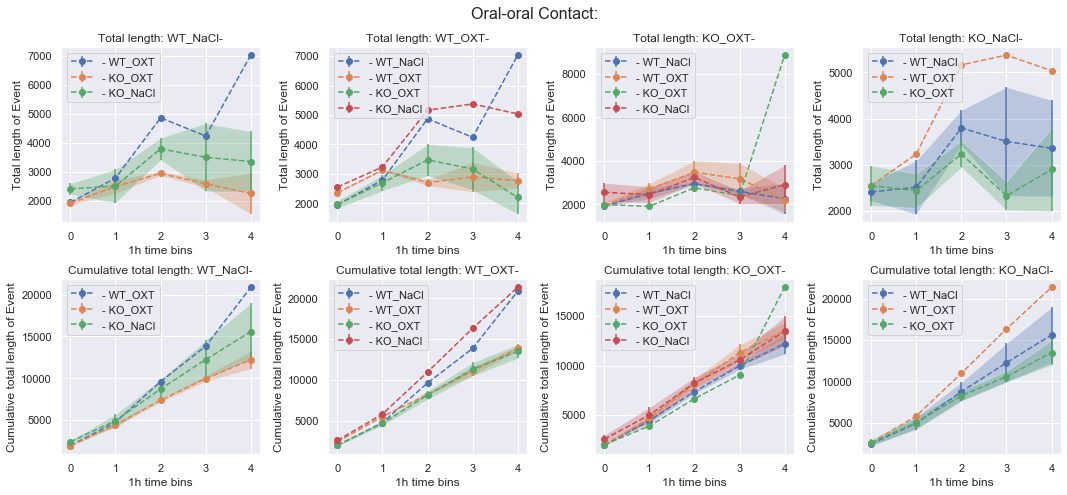

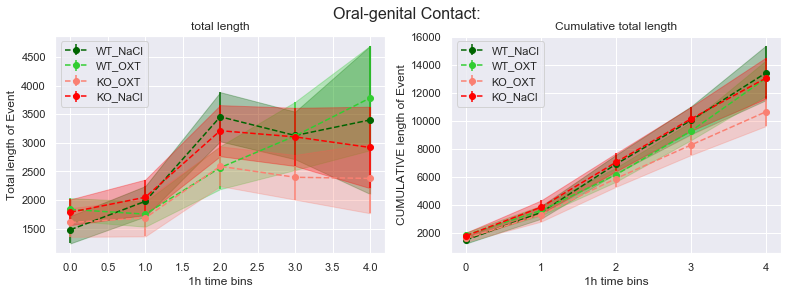

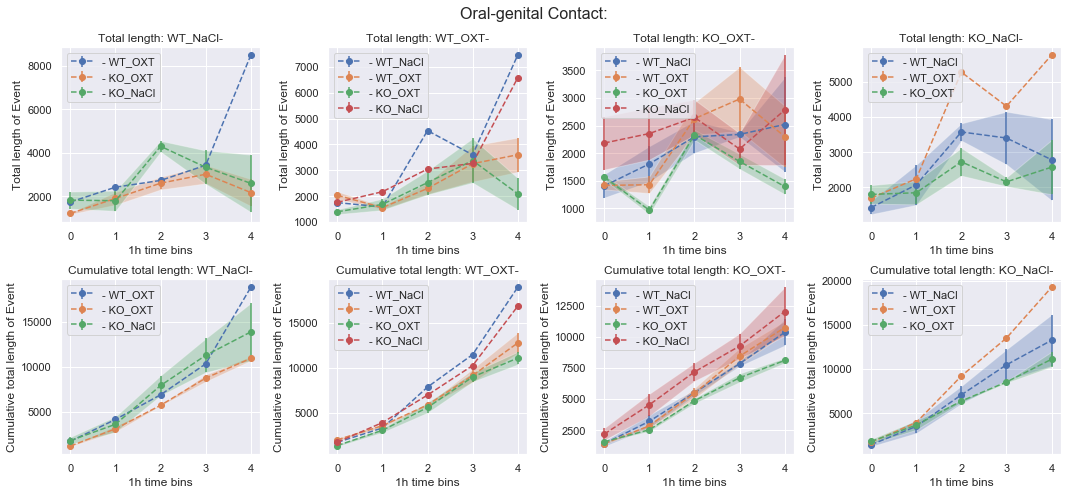

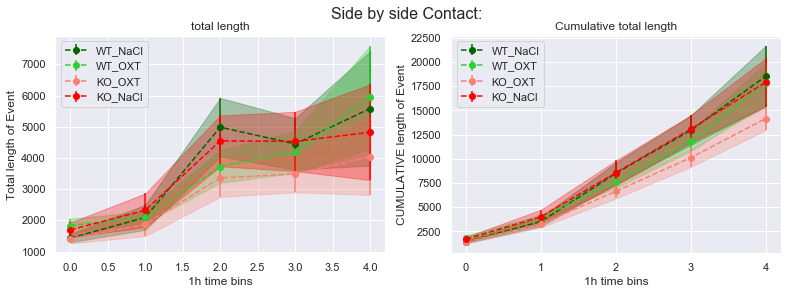

KeyboardInterrupt: 

In [103]:
#Plot the data of GROUPED genotypes using the DOUBLE groupby dataframe:
#dfOne.groupby(['name','GenoA'], as_index=False).get_group(('Move','KO_OXT')).groupby(['bin'], as_index=False)['totalLength'].mean()

# genotypes = ["WT_NaCl", "WT_OXT", "KO_OXT", "KO_NaCl"] #Do not plot Hetero mice

#Define if a behavior is bilateral or unilateral (symetric or not): NOT USED !!!
# beh_bilateral = ["Contact", 'Oral-oral Contact','Side by side Contact','Side by side Contact, opposite way','Group2']
# beh_unilateral = ['Oral-genital Contact','Social approach', 'Social escape', 'Approach contact',
#                   'Approach rear', 'Break contact', 'Get away','FollowZone Isolated', 'Train2']

#Group data by behavior, genotype of animal A and genotype of animal B
dfGrouped = dfTwo.groupby(['name','GenoA', 'GenoB'], as_index=False)

for beh in dfTwo['name'].unique():
    ##Fig1 for average of behaviors for the different genotypes:
    fig1, ax1 = plt.subplots(nrows=1,ncols=2,figsize=(13,4)) #Create a figure with 1 row and 2 columns of subplots
    fig1.suptitle(f"{beh}:" , fontsize=16)
    plt.xticks(np.arange(0,5,step=1)) #x-axis with 0 to 4 bins

    ##Fig2 for the average of genotype-genotype interaction on the different behaviors:
    fig2, ax2 = plt.subplots(nrows=2,ncols=4,figsize=(15,7)) #Create a figure with 2 rows and 8 columns of subplots
    fig2.suptitle(f"{beh}:" , fontsize=16)
    
    countGraph = 0
    
    for geno1 in genotypes:
#             print(geno1)
        if "WT" in geno1:
            color = "limegreen" if ("OXT" in geno1) else "darkgreen"
        if "KO" in geno1:
            color = "salmon" if ("OXT" in geno1) else "red"
        if "Hetero" in geno1:
            color = "silver" if ("OXT" in geno1) else "grey"

        #Define the selection Condition over Behavior, Genotype-animalA:
        beh_geno1 = (dfTwo['name']==beh) & (dfTwo['GenoA']==geno1)
        df_grouped = dfTwo.groupby(['name','GenoA'], as_index=False).get_group((beh,geno1)) #Define the Groupby dataframe

        ###Compute the average of the behaviors to plot + SEM
        x = df_grouped.groupby(['bin'], as_index=False)['bin'].mean() #x-axis bins

        df_totalLen_mean = df_grouped.groupby(['bin'])['totalLength'].mean()
        df_totalLen_std = df_grouped.groupby(['bin'])['totalLength'].std()
        df_totalLen_sem = df_totalLen_std / math.sqrt(len(df_totalLen_std))

        ##Plot 'total length'
#         ax1[0].plot(df_totalLen_mean.index, df_totalLen_mean, color=color, marker='o', label=geno1) #plot totalLength
        ax1[0].errorbar(x,df_totalLen_mean,df_totalLen_sem, marker='o', 
                        linestyle='--', color = color, label = geno1) #Plot The Average
        ax1[0].fill_between(x,df_totalLen_mean-df_totalLen_sem, df_totalLen_mean+df_totalLen_sem, color=color, alpha=0.3) #Plot the SEM of the average
        ax1[0].legend()
        ax1[0].set_xlabel('1h time bins')
        ax1[0].set_title("total length")
        ax1[0].set_ylabel('Total length of Event') #Y-axis label on left graph

        ####Compute the CUMULATIVE average of the behaviors to plot + SEM
        df_totalLen_cum = df_grouped.groupby(['bin'])['totalLength_cum'].mean()
        df_totalLen_cum_std = df_grouped.groupby(['bin'])['totalLength_cum'].std()
        df_totalLen_cum_sem = df_totalLen_cum_std / math.sqrt(len(df_totalLen_cum_std))
        
        ##Plot 'CUMULATIVE total length'
#         df_totalLen_cum.plot(x='bin', y='totalLength_cum', color=color, marker='o', label=geno1, ax=ax[1]) #plot Cumulative Length
        ax1[1].errorbar(x,df_totalLen_cum,df_totalLen_cum_sem, marker='o', 
                        linestyle='--', color = color, label = geno1) #Plot The Average
        ax1[1].fill_between(x,df_totalLen_cum-df_totalLen_cum_sem, df_totalLen_cum+df_totalLen_cum_sem, color=color, alpha=0.3) #Plot the SEM of the average
        ax1[1].set_xlabel('1h time bins')
        ax1[1].legend()
        ax1[1].set_title("Cumulative total length")
        ax1[1].set_ylabel('CUMULATIVE length of Event')

        plt.xticks(np.arange(0,5,step=1)) #x-axis with 0 to 4 bins
            
        for geno2 in genotypes:
            ##Define the selection Condition over Behavior, Genotype-animalA and Genotype-animalB:
            beh_geno1_geno2 = (dfTwo['name']==beh) & (dfTwo['GenoA']==geno1) & (dfTwo['GenoB']==geno2) 

            ##Define the Groupby dataframe:
            if len(dfTwo[(dfTwo['GenoA']==geno1) & (dfTwo['GenoB']==geno2)]) == 0:#NO Geno1-Geno2 match
#                 print(f"No match between {geno1} and {geno2}")
                continue  
            df_grouped2 = dfTwo.groupby(['name','GenoA', 'GenoB'], as_index=False).get_group((beh,geno1, geno2))
            
            ##Plot data of Total Length
            x2 = df_grouped2.groupby(['bin'], as_index=False)['bin'].mean() #x-axis bins

            df_totalLen_mean2 = df_grouped2.groupby(['bin'])['totalLength'].mean()
            df_totalLen_std2 = df_grouped2.groupby(['bin'])['totalLength'].std()
            df_totalLen_sem2 = df_totalLen_std2 / math.sqrt(len(df_totalLen_std))

#            ax2[0,countGraph].plot(df_totalLen_mean2.index, df_totalLen_mean, marker='o', label=f"-{geno2}") #plot totalLength
            ax2[0,countGraph].errorbar(x2,df_totalLen_mean2,df_totalLen_sem2, label=f"- {geno2}",
                                       linestyle='--', marker='o') #Plot The error bars
            ax2[0,countGraph].fill_between(x2,df_totalLen_mean2-df_totalLen_sem2,
                                           df_totalLen_mean2+df_totalLen_sem2, alpha=0.3) #Plot the SEM of the average
            ax2[0,countGraph].legend()
            ax2[0,countGraph].set_xlabel('1h time bins')
            ax2[0,countGraph].set_title(f"Total length: {geno1}-")
            ax2[0,countGraph].set_ylabel('Total length of Event') #Y-axis label on left graph
            
            ##PLot data of CUMULATIVE total length
            x2_cum = df_grouped2.groupby(['bin'], as_index=False)['bin'].mean() #x-axis bins

            df_totalLen_mean2_cum = df_grouped2.groupby(['bin'])['totalLength_cum'].mean()
            df_totalLen_std2_cum = df_grouped2.groupby(['bin'])['totalLength_cum'].std()
            df_totalLen_sem2_cum = df_totalLen_std2_cum / math.sqrt(len(df_totalLen_std2_cum))

#            ax2[0,countGraph].plot(df_totalLen_mean2.index, df_totalLen_mean, marker='o', label=f"-{geno2}") #plot totalLength
            ax2[1,countGraph].errorbar(x2_cum,df_totalLen_mean2_cum,df_totalLen_sem2_cum, label=f"- {geno2}",
                                       linestyle='--', marker='o') #Plot The error bars
            ax2[1,countGraph].fill_between(x2_cum,df_totalLen_mean2_cum-df_totalLen_sem2_cum,
                                           df_totalLen_mean2_cum+df_totalLen_sem2_cum, alpha=0.3) #Plot the SEM of the average
            ax2[1,countGraph].legend()
            ax2[1,countGraph].set_xlabel('1h time bins')
            ax2[1,countGraph].set_title(f"Cumulative total length: {geno1}-")
            ax2[1,countGraph].set_ylabel('Cumulative total length of Event') #Y-axis label on left graph
            
        countGraph +=1
    
    plt.tight_layout() #Display nicely the subgraphs (and fits the png size)
    plt.subplots_adjust(top=0.90) #Adjust where the plots starts (Otherwise overlap with title)

    plt.show() #Display the figure
    fig1.savefig(f"Hab_1h-bins_{beh}_Beh-2-animals_avg.png", dpi=100) # SAVE A .PNG FIGURE
    fig2.savefig(f"Hab_1h-bins_{beh}_Beh-2-animals_details.png", dpi=100) # SAVE A .PNG FIGURE

# 3) Behaviors with Three animals:

## 3.1) Define the dfThree and calculate the cumulative sum of behaviors 

In [34]:
df.name.unique()

array(['Move', 'Move isolated', 'Rearing', 'Rear isolated',
       'Stop isolated', 'WallJump', 'SAP', 'Huddling', 'WaterPoint',
       'Contact', 'Oral-oral Contact', 'Oral-genital Contact',
       'Side by side Contact', 'Side by side Contact, opposite way',
       'Social approach', 'Social escape', 'Approach contact',
       'Approach rear', 'Break contact', 'Get away',
       'FollowZone Isolated', 'Train2', 'Group2', 'Group3', 'Group4',
       'Nest4'], dtype=object)

In [112]:
#Create a dataframe "dfTwo" with the behaviors involving TWO animals!
behaviorsThree = ['Group3', 'Group3 Make', 'Group3 Break', 'Train3', 'Nest3']
dfThree = df[df['name'].isin(behaviorsThree)] #Create the dataframe from the main DF
dfThree = dfThree.drop(columns=["idD","GenoD",'RFidD']) #Removes useless columns
dfThree

Date   Cage Session  bin  start_frame  stop_frame    name  idA  idB  \
111   190812  Cage3    Hab1    0         2000      110000  Group3    1  3.0   
112   190812  Cage3    Hab1    0         2000      110000  Group3    1  2.0   
113   190812  Cage3    Hab1    0         2000      110000  Group3    3  1.0   
114   190812  Cage3    Hab1    0         2000      110000  Group3    3  2.0   
115   190812  Cage3    Hab1    0         2000      110000  Group3    2  1.0   
...      ...    ...     ...  ...          ...         ...     ...  ...  ...   
7432  190911  Cage6    Hab1    4       434000      542000  Group3    4  1.0   
7433  190911  Cage6    Hab1    4       434000      542000  Group3    4  3.0   
7434  190911  Cage6    Hab1    4       434000      542000  Group3    4  3.0   
7435  190911  Cage6    Hab1    4       434000      542000  Group3    4  2.0   
7436  190911  Cage6    Hab1    4       434000      542000  Group3    4  2.0   

      idC  ...        GenoA        GenoB        GenoC totalLength  meanLength  \
111   2.0  ...  Hetero_NaCl  Hetero_NaCl      KO_NaCl        5224   21.409836   
112   3.0  ...  Hetero_NaCl      KO_NaCl  Hetero_NaCl        5224   21.409836   
113   2.0  ...  Hetero_NaCl  Hetero_NaCl      KO_NaCl        5224   21.409836   
114   1.0  ...  Hetero_NaCl      KO_NaCl  Hetero_NaCl        5224   21.409836   
115   3.0  ...      KO_NaCl  Hetero_NaCl  Hetero_NaCl        5224   21.409836   
...   ...  ...          ...          ...          ...         ...         ...   
7432  2.0  ...       WT_OXT       KO_OXT       WT_OXT        3646   27.832061   
7433  1.0  ...       WT_OXT       KO_OXT       KO_OXT        3507   38.538462   
7434  2.0  ...       WT_OXT       KO_OXT       WT_OXT        4100  128.125000   
7435  1.0  ...       WT_OXT       WT_OXT       KO_OXT        3646   27.832061   
7436  3.0  ...       WT_OXT       WT_OXT       KO_OXT        4100  128.125000   

     medianLength  numberOfEvents   stdLength   CI95_low     CI95_up  
111           6.0             244   38.599935  16.566465   26.253207  
112           6.0             244   38.599935  16.566465   26.253207  
113           6.0             244   38.599935  16.566465   26.253207  
114           6.0             244   38.599935  16.566465   26.253207  
115           6.0             244   38.599935  16.566465   26.253207  
...           ...             ...         ...        ...         ...  
7432          2.0             131   76.918729  14.660037   41.004085  
7433          3.0              91   78.819352  22.343936   54.732987  
7434          3.0              32  587.294525 -75.362171  331.612171  
7435          2.0             131   76.918729  14.660037   41.004085  
7436          3.0              32  587.294525 -75.362171  331.612171  

[630 rows x 23 columns]

In [127]:
#Adds the Cumulative length of totalLength and meanLength of the 'dfOne' Dataframe 

behaviors = dfThree.name.unique()
rfidAs = dfThree.RFidA.unique()
rfidBs = dfThree.RFidB.unique()
rfidCs = dfThree.RFidC.unique()

with tqdm_notebook(total=behaviors.shape[0]*rfidAs.shape[0]*rfidBs.shape[0]*rfidCs.shape[0]) as t:
    for beh in behaviors:
        for rfid1 in rfidAs:
            for rfid2 in rfidBs:
                for rfid3 in rfidCs:
                    cond = (dfThree.name==beh) & (dfThree.RFidA==rfid1) & (dfThree.RFidB==rfid2) & (dfThree.RFidC==rfid3)
                    dfThree.loc[cond, "totalLength_cum"] = dfThree.loc[cond, "totalLength"].cumsum()
                    dfThree.loc[cond, "meanLength_cum"] = dfThree.loc[cond, "meanLength"].cumsum()
                    t.update()

In [110]:
dfThree

Date   Cage Session  bin  start_frame  stop_frame    name  idA  idB  \
111   190812  Cage3    Hab1    0         2000      110000  Group3    1  3.0   
112   190812  Cage3    Hab1    0         2000      110000  Group3    1  2.0   
113   190812  Cage3    Hab1    0         2000      110000  Group3    3  1.0   
114   190812  Cage3    Hab1    0         2000      110000  Group3    3  2.0   
115   190812  Cage3    Hab1    0         2000      110000  Group3    2  1.0   
...      ...    ...     ...  ...          ...         ...     ...  ...  ...   
7432  190911  Cage6    Hab1    4       434000      542000  Group3    4  1.0   
7433  190911  Cage6    Hab1    4       434000      542000  Group3    4  3.0   
7434  190911  Cage6    Hab1    4       434000      542000  Group3    4  3.0   
7435  190911  Cage6    Hab1    4       434000      542000  Group3    4  2.0   
7436  190911  Cage6    Hab1    4       434000      542000  Group3    4  2.0   

      idC  ...        GenoC  totalLength  meanLength medianLength  \
111   2.0  ...      KO_NaCl         5224   21.409836          6.0   
112   3.0  ...  Hetero_NaCl         5224   21.409836          6.0   
113   2.0  ...      KO_NaCl         5224   21.409836          6.0   
114   1.0  ...  Hetero_NaCl         5224   21.409836          6.0   
115   3.0  ...  Hetero_NaCl         5224   21.409836          6.0   
...   ...  ...          ...          ...         ...          ...   
7432  2.0  ...       WT_OXT         3646   27.832061          2.0   
7433  1.0  ...       KO_OXT         3507   38.538462          3.0   
7434  2.0  ...       WT_OXT         4100  128.125000          3.0   
7435  1.0  ...       KO_OXT         3646   27.832061          2.0   
7436  3.0  ...       KO_OXT         4100  128.125000          3.0   

     numberOfEvents   stdLength   CI95_low     CI95_up  totalLength_cum  \
111             244   38.599935  16.566465   26.253207           5224.0   
112             244   38.599935  16.566465   26.253207           5224.0   
113             244   38.599935  16.566465   26.253207           5224.0   
114             244   38.599935  16.566465   26.253207           5224.0   
115             244   38.599935  16.566465   26.253207           5224.0   
...             ...         ...        ...         ...              ...   
7432            131   76.918729  14.660037   41.004085          28672.0   
7433             91   78.819352  22.343936   54.732987          14871.0   
7434             32  587.294525 -75.362171  331.612171          21927.0   
7435            131   76.918729  14.660037   41.004085          28672.0   
7436             32  587.294525 -75.362171  331.612171          21927.0   

      meanLength_cum  
111        21.409836  
112        21.409836  
113        21.409836  
114        21.409836  
115        21.409836  
...              ...  
7432      194.375238  
7433      149.358422  
7434      295.913230  
7435      194.375238  
7436      295.913230  

[630 rows x 25 columns]

#### Check that the Cumulative sum is correct:

In [131]:
dfThree.groupby(['name','GenoA', 'GenoB', 'GenoC'], as_index=False).get_group(('Group3','KO_OXT','WT_OXT','KO_OXT')).sort_values(['RFidA','bin']) 

Date   Cage Session  bin  start_frame  stop_frame    name  idA  idB  \
6317  190911  Cage6    Hab1    0         2000      110000  Group3    3  2.0   
6319  190911  Cage6    Hab1    0         2000      110000  Group3    3  4.0   
6593  190911  Cage6    Hab1    1       110000      218000  Group3    3  2.0   
6595  190911  Cage6    Hab1    1       110000      218000  Group3    3  4.0   
6869  190911  Cage6    Hab1    2       218000      326000  Group3    3  2.0   
6871  190911  Cage6    Hab1    2       218000      326000  Group3    3  4.0   
7145  190911  Cage6    Hab1    3       326000      434000  Group3    3  2.0   
7147  190911  Cage6    Hab1    3       326000      434000  Group3    3  4.0   
7421  190911  Cage6    Hab1    4       434000      542000  Group3    3  2.0   
7423  190911  Cage6    Hab1    4       434000      542000  Group3    3  4.0   
6311  190911  Cage6    Hab1    0         2000      110000  Group3    1  2.0   
6313  190911  Cage6    Hab1    0         2000      110000  Group3    1  4.0   
6587  190911  Cage6    Hab1    1       110000      218000  Group3    1  2.0   
6589  190911  Cage6    Hab1    1       110000      218000  Group3    1  4.0   
6863  190911  Cage6    Hab1    2       218000      326000  Group3    1  2.0   
6865  190911  Cage6    Hab1    2       218000      326000  Group3    1  4.0   
7139  190911  Cage6    Hab1    3       326000      434000  Group3    1  2.0   
7141  190911  Cage6    Hab1    3       326000      434000  Group3    1  4.0   
7415  190911  Cage6    Hab1    4       434000      542000  Group3    1  2.0   
7417  190911  Cage6    Hab1    4       434000      542000  Group3    1  4.0   

      idC  ...   GenoC  totalLength  meanLength medianLength numberOfEvents  \
6317  1.0  ...  KO_OXT         3601   23.383117          4.0            154   
6319  1.0  ...  KO_OXT         2025   16.735537          3.0            121   
6593  1.0  ...  KO_OXT         2432   20.965517          4.0            116   
6595  1.0  ...  KO_OXT         1722   15.105263          4.0            114   
6869  1.0  ...  KO_OXT         4943   29.248521          4.0            169   
6871  1.0  ...  KO_OXT         4209   37.918919          3.0            111   
7145  1.0  ...  KO_OXT         1683   21.303797          3.0             79   
7147  1.0  ...  KO_OXT         3408   41.060241          7.0             83   
7421  1.0  ...  KO_OXT          505   14.852941          2.5             34   
7423  1.0  ...  KO_OXT         3507   38.538462          3.0             91   
6311  3.0  ...  KO_OXT         3601   23.383117          4.0            154   
6313  3.0  ...  KO_OXT         2025   16.735537          3.0            121   
6587  3.0  ...  KO_OXT         2432   20.965517          4.0            116   
6589  3.0  ...  KO_OXT         1722   15.105263          4.0            114   
6863  3.0  ...  KO_OXT         4928   29.333333          4.0            168   
6865  3.0  ...  KO_OXT         4151   42.357143          4.0             98   
7139  3.0  ...  KO_OXT         1683   21.303797          3.0             79   
7141  3.0  ...  KO_OXT         3408   41.060241          7.0             83   
7415  3.0  ...  KO_OXT          505   14.852941          2.5             34   
7417  3.0  ...  KO_OXT         3507   38.538462          3.0             91   

       stdLength   CI95_low    CI95_up  totalLength_cum  meanLength_cum  
6317   47.995427  15.802657  30.963577           3601.0       23.383117  
6319   30.810208  11.245718  22.225356           2025.0       16.735537  
6593   45.710847  12.646992  29.284043           6033.0       44.348634  
6595   29.123864   9.758972  20.451555           3747.0       31.840800  
6869   66.009124  19.296376  39.200666          10976.0       73.597155  
6871  112.247004  17.037051  58.800787           7956.0       69.759719  
7145   69.744625   5.923906  36.683689          12659.0       94.900952  
7147  101.330468  19.260212  62.860270          11364.0      110.819960  
7421   29.626233   4.8

## 3.2) Plot for the behaviors with Three animals
ADAPT FOR THREE ANIMALS !!

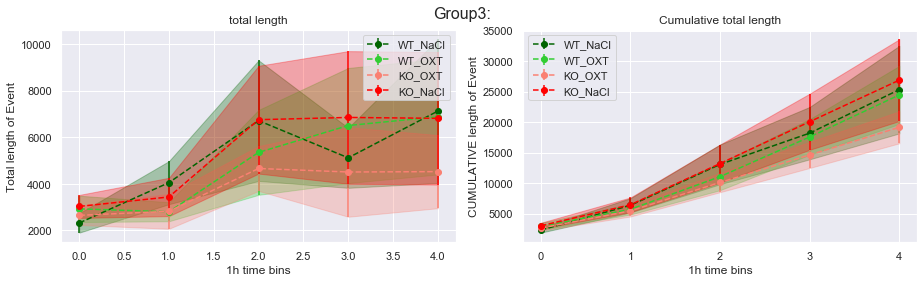

In [132]:
#Plot the data of GROUPED groups using the DOUBLE groupby dataframe:
#dfOne.groupby(['name','GenoA'], as_index=False).get_group(('Move','KO_OXT')).groupby(['bin'], as_index=False)['totalLength'].mean()

groups = ["WT_NaCl", "WT_OXT", "KO_OXT", "KO_NaCl"] #Do not plot Hetero mice

#Define if a behavior is bilateral or unilateral (symetric or not): NOT USED !!!
# beh_bilateral = ["Contact", 'Oral-oral Contact','Side by side Contact','Side by side Contact, opposite way','Group2']
# beh_unilateral = ['Oral-genital Contact','Social approach', 'Social escape', 'Approach contact',
#                   'Approach rear', 'Break contact', 'Get away','FollowZone Isolated', 'Train2']

#Group data by behavior, genotype of animal A and genotype of animal B
dfGrouped = dfThree.groupby(['name','GenoA', 'GenoB', 'GenoC'], as_index=False)

for beh in dfThree['name'].unique():
    ##Fig1 for average of behaviors for the different groups:
    fig1, ax1 = plt.subplots(nrows=1,ncols=2,figsize=(13,4)) #Create a figure with 1 row and 2 columns of subplots
    fig1.suptitle(f"{beh}:" , fontsize=16)
    plt.xticks(np.arange(0,5,step=1)) #x-axis with 0 to 4 bins

    countGraph = 0
    
    for geno1 in groups:
#             print(geno1)
        if "WT" in geno1:
            color = "limegreen" if ("OXT" in geno1) else "darkgreen"
        if "KO" in geno1:
            color = "salmon" if ("OXT" in geno1) else "red"
        if "Hetero" in geno1:
            color = "silver" if ("OXT" in geno1) else "grey"

        #Define the selection Condition over Behavior, Genotype-animalA:
        beh_geno1 = (dfThree['name']==beh) & (dfThree['GenoA']==geno1)
        df_grouped = dfThree.groupby(['name','GenoA'], as_index=False).get_group((beh,geno1)) #Define the Groupby dataframe

        ###Compute the average of the behaviors to plot + SEM
        x = df_grouped.groupby(['bin'], as_index=False)['bin'].mean() #x-axis bins

        df_totalLen_mean = df_grouped.groupby(['bin'])['totalLength'].mean()
        df_totalLen_std = df_grouped.groupby(['bin'])['totalLength'].std()
        df_totalLen_sem = df_totalLen_std / math.sqrt(len(df_totalLen_std))

        ##Plot 'total length'
#         ax1[0].plot(df_totalLen_mean.index, df_totalLen_mean, color=color, marker='o', label=geno1) #plot totalLength
        ax1[0].errorbar(x,df_totalLen_mean,df_totalLen_sem, marker='o', 
                        linestyle='--', color = color, label = geno1) #Plot The Average
        ax1[0].fill_between(x,df_totalLen_mean-df_totalLen_sem, df_totalLen_mean+df_totalLen_sem, color=color, alpha=0.3) #Plot the SEM of the average
        ax1[0].legend()
        ax1[0].set_xlabel('1h time bins')
        ax1[0].set_title("total length")
        ax1[0].set_ylabel('Total length of Event') #Y-axis label on left graph

        ####Compute the CUMULATIVE average of the behaviors to plot + SEM
        df_totalLen_cum = df_grouped.groupby(['bin'])['totalLength_cum'].mean()
        df_totalLen_cum_std = df_grouped.groupby(['bin'])['totalLength_cum'].std()
        df_totalLen_cum_sem = df_totalLen_cum_std / math.sqrt(len(df_totalLen_cum_std))
        
        ##Plot 'CUMULATIVE total length'
#         df_totalLen_cum.plot(x='bin', y='totalLength_cum', color=color, marker='o', label=geno1, ax=ax[1]) #plot Cumulative Length
        ax1[1].errorbar(x,df_totalLen_cum,df_totalLen_cum_sem, marker='o', 
                        linestyle='--', color = color, label = geno1) #Plot The Average
        ax1[1].fill_between(x,df_totalLen_cum-df_totalLen_cum_sem, df_totalLen_cum+df_totalLen_cum_sem, color=color, alpha=0.3) #Plot the SEM of the average
        ax1[1].set_xlabel('1h time bins')
        ax1[1].legend()
        ax1[1].set_title("Cumulative total length")
        ax1[1].set_ylabel('CUMULATIVE length of Event')

        plt.xticks(np.arange(0,5,step=1)) #x-axis with 0 to 4 bins
            
        countGraph +=1
    
    plt.tight_layout() #Display nicely the subgraphs (and fits the png size)
    plt.subplots_adjust(top=0.90) #Adjust where the plots starts (Otherwise overlap with title)

    plt.show() #Display the figure
#     fig1.savefig(f"Hab_1h-bins_{beh}_Beh-2-animals_avg.png", dpi=100) # SAVE A .PNG FIGURE

# 4) Behaviors with Four animals:

## 4.1) Define the dfFour and calculate the cumulative sum of behaviors 

In [34]:
df.name.unique()

array(['Move', 'Move isolated', 'Rearing', 'Rear isolated',
       'Stop isolated', 'WallJump', 'SAP', 'Huddling', 'WaterPoint',
       'Contact', 'Oral-oral Contact', 'Oral-genital Contact',
       'Side by side Contact', 'Side by side Contact, opposite way',
       'Social approach', 'Social escape', 'Approach contact',
       'Approach rear', 'Break contact', 'Get away',
       'FollowZone Isolated', 'Train2', 'Group2', 'Group3', 'Group4',
       'Nest4'], dtype=object)

In [115]:
#Create a dataframe "dfTwo" with the behaviors involving TWO animals!
behaviorsFour = ['Group4', 'Group4 Make', 'Group4 Break', 'Train4', 'Nest4']
dfFour = df[df['name'].isin(behaviorsFour)] #Create the dataframe from the main DF
dfFour

Date   Cage Session  bin  start_frame  stop_frame    name  idA  idB  \
813   190813  Cage1    Hab1    0         2000      110000  Group4    4  2.0   
814   190813  Cage1    Hab1    0         2000      110000  Group4    4  2.0   
815   190813  Cage1    Hab1    0         2000      110000  Group4    4  3.0   
816   190813  Cage1    Hab1    0         2000      110000  Group4    4  3.0   
817   190813  Cage1    Hab1    0         2000      110000  Group4    4  1.0   
...      ...    ...     ...  ...          ...         ...     ...  ...  ...   
7480  190911  Cage6    Hab1    4       434000      542000   Nest4    4  1.0   
7481  190911  Cage6    Hab1    4       434000      542000   Nest4    4  3.0   
7482  190911  Cage6    Hab1    4       434000      542000   Nest4    4  3.0   
7483  190911  Cage6    Hab1    4       434000      542000   Nest4    4  2.0   
7484  190911  Cage6    Hab1    4       434000      542000   Nest4    4  2.0   

      idC  ...    GenoB    GenoC    GenoD  totalLength  meanLength  \
813   3.0  ...  KO_NaCl   KO_OXT  WT_NaCl            0         NaN   
814   1.0  ...  KO_NaCl  WT_NaCl   KO_OXT            0         NaN   
815   2.0  ...   KO_OXT  KO_NaCl  WT_NaCl          931        13.3   
816   1.0  ...   KO_OXT  WT_NaCl  KO_NaCl            0         NaN   
817   2.0  ...  WT_NaCl  KO_NaCl   KO_OXT            0         NaN   
...   ...  ...      ...      ...      ...          ...         ...   
7480  2.0  ...   KO_OXT   WT_OXT   KO_OXT            0         NaN   
7481  1.0  ...   KO_OXT   KO_OXT   WT_OXT            0         NaN   
7482  2.0  ...   KO_OXT   WT_OXT   KO_OXT            0         NaN   
7483  1.0  ...   WT_OXT   KO_OXT   KO_OXT            0         NaN   
7484  3.0  ...   WT_OXT   KO_OXT   KO_OXT            0         NaN   

     medianLength numberOfEvents  stdLength  CI95_low    CI95_up  
813           NaN              0        NaN       NaN        NaN  
814           NaN              0        NaN       NaN        NaN  
815           4.0             70  25.256032  7.383401  19.216599  
816           NaN              0        NaN       NaN        NaN  
817           NaN              0        NaN       NaN        NaN  
...           ...            ...        ...       ...        ...  
7480          NaN              0        NaN       NaN        NaN  
7481          NaN              0        NaN       NaN        NaN  
7482          NaN              0        NaN       NaN        NaN  
7483          NaN              0        NaN       NaN        NaN  
7484          NaN              0        NaN       NaN        NaN  

[1200 rows x 26 columns]

In [123]:
#Adds the Cumulative length of totalLength and meanLength of the 'dfOne' Dataframe 

behaviors = dfFour.name.unique()
rfidAs = dfFour.RFidA.unique()
rfidBs = dfFour.RFidB.unique()
rfidCs = dfFour.RFidC.unique()
rfidDs = dfFour.RFidD.unique()

with tqdm_notebook(total=behaviors.shape[0]*rfidAs.shape[0]*rfidBs.shape[0]*rfidCs.shape[0]*rfidDs.shape[0]) as t:
    for beh in behaviors:
        for rfid1 in rfidAs:
            for rfid2 in rfidBs:
                if rfid1 == rfid2:
                    t.update()
                    continue
                for rfid3 in rfidCs:
                    if rfid3 == rfid2 or rfid3 == rfid1:
                        t.update()
                        continue
                    for rfid4 in rfidDs:
                        if rfid4 == rfid2 or rfid3 == rfid4 or rfid1 == rfid4:
                            t.update()
                            continue
                        cond = (dfFour.name==beh) & (dfFour.RFidA==rfid1) & (dfFour.RFidB==rfid2) & (dfFour.RFidC==rfid3) & (dfFour.RFidD==rfid4)
                        dfFour.loc[cond, "totalLength_cum"] = dfFour.loc[cond, "totalLength"].cumsum()
                        dfFour.loc[cond, "meanLength_cum"] = dfFour.loc[cond, "meanLength"].cumsum()
                        t.update()
                        

KeyboardInterrupt: 

In [124]:
dfFour

Date   Cage Session  bin  start_frame  stop_frame    name  idA  idB  \
813   190813  Cage1    Hab1    0         2000      110000  Group4    4  2.0   
814   190813  Cage1    Hab1    0         2000      110000  Group4    4  2.0   
815   190813  Cage1    Hab1    0         2000      110000  Group4    4  3.0   
816   190813  Cage1    Hab1    0         2000      110000  Group4    4  3.0   
817   190813  Cage1    Hab1    0         2000      110000  Group4    4  1.0   
...      ...    ...     ...  ...          ...         ...     ...  ...  ...   
7480  190911  Cage6    Hab1    4       434000      542000   Nest4    4  1.0   
7481  190911  Cage6    Hab1    4       434000      542000   Nest4    4  3.0   
7482  190911  Cage6    Hab1    4       434000      542000   Nest4    4  3.0   
7483  190911  Cage6    Hab1    4       434000      542000   Nest4    4  2.0   
7484  190911  Cage6    Hab1    4       434000      542000   Nest4    4  2.0   

      idC  ...    GenoD  totalLength  meanLength  medianLength  \
813   3.0  ...  WT_NaCl            0         NaN           NaN   
814   1.0  ...   KO_OXT            0         NaN           NaN   
815   2.0  ...  WT_NaCl          931        13.3           4.0   
816   1.0  ...  KO_NaCl            0         NaN           NaN   
817   2.0  ...   KO_OXT            0         NaN           NaN   
...   ...  ...      ...          ...         ...           ...   
7480  2.0  ...   KO_OXT            0         NaN           NaN   
7481  1.0  ...   WT_OXT            0         NaN           NaN   
7482  2.0  ...   KO_OXT            0         NaN           NaN   
7483  1.0  ...   KO_OXT            0         NaN           NaN   
7484  3.0  ...   KO_OXT            0         NaN           NaN   

      numberOfEvents  stdLength  CI95_low    CI95_up totalLength_cum  \
813                0        NaN       NaN        NaN             0.0   
814                0        NaN       NaN        NaN             0.0   
815               70  25.256032  7.383401  19.216599           931.0   
816                0        NaN       NaN        NaN             0.0   
817                0        NaN       NaN        NaN             0.0   
...              ...        ...       ...        ...             ...   
7480               0        NaN       NaN        NaN             0.0   
7481               0        NaN       NaN        NaN             0.0   
7482               0        NaN       NaN        NaN             0.0   
7483               0        NaN       NaN        NaN             0.0   
7484               0        NaN       NaN        NaN             0.0   

      meanLength_cum  
813              NaN  
814              NaN  
815             13.3  
816              NaN  
817              NaN  
...              ...  
7480             NaN  
7481             NaN  
7482             NaN  
7483             NaN  
7484             NaN  

[1200 rows x 28 columns]

# ADDITIONAL STUFF:

C:\Users\Damien\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\Damien\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


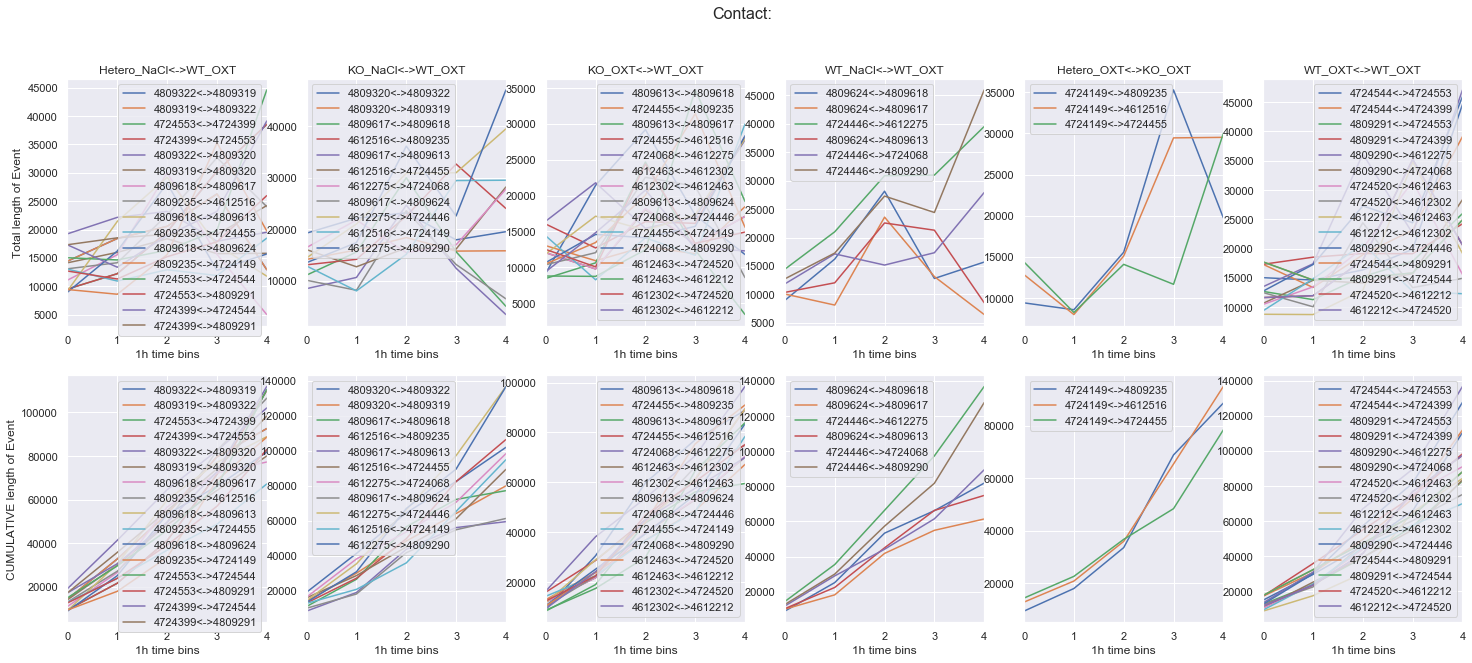

KeyboardInterrupt: 

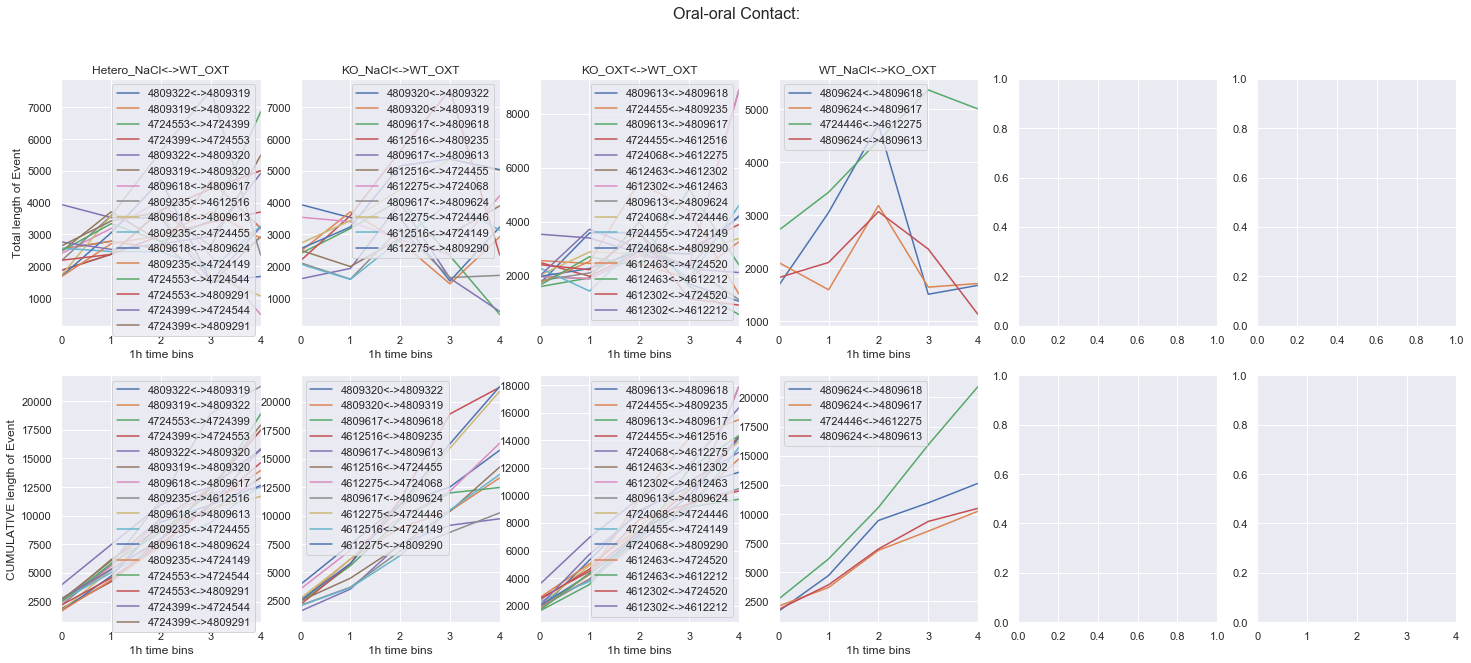

In [95]:
#Plot the data of the different behaviors, Grouped by genotype<-> interactions:
for beh in dfTwo['name'].unique():
#     print(beh)
    fig, ax = plt.subplots(nrows=2,ncols=6,figsize=(25,10)) #Create a figure with 2 rows and 6 columns of subplots
    fig.suptitle(f"{beh}:" , fontsize=16)
    
    count = 0

    for geno1 in dfTwo['GenoA'].unique():
#         print(f" **** {geno1} ****")
#         print(dfTwo[(dfTwo['name']==beh) & (dfTwo['GenoA']==geno1)]['RFidA'].unique())
        for geno2 in dfTwo['GenoB'].unique():
#             print(f" ** {geno2} **")
            
            #Define the 'selection' of Behavior, Genotype-animalA and Genotype-animalB:
            selection = (dfTwo['name']==beh) & (dfTwo['GenoA']==geno1) & (dfTwo['GenoB']==geno2) 

            #Define the Groupby dataframe:
            if len(dfTwo[(dfTwo['name']==beh) & (dfTwo['GenoA']==geno1) & (dfTwo['GenoB']==geno2)]) == 0: # Test if NO Geno1-Geno2 match
#                         print(f"No match between {geno1} and {geno2}")
                        continue  
            df_temp = dfTwo.groupby(['name','GenoA', 'GenoB']).get_group((beh,geno1, geno2)) 

            for rf1 in df_temp[selection]['RFidA'].unique():
#                 print(f"rf1:{rf1}")
                for rf2 in df_temp[selection]['RFidB'].unique():
                    rf2 = int(rf2)
                    if rf1 == rf2:
#                         print("Same ID ... Continue")
                        continue
#                     print(f"rf2:{rf2}")

                    if len(df_temp[(df_temp['RFidA']==rf1) & (df_temp['RFidB']==rf2)]) == 0:#NO RF1-RF2 match
#                         print(f"No match between {rf1} and {rf2}")
                        continue          
                        
                    df_temp[(df_temp['RFidA']==rf1) & (df_temp['RFidB']==rf2)].plot(x='bin', y='totalLength', label=f"{rf1}<->{rf2}", ax=ax[0,count])
                    df_temp[(df_temp['RFidA']==rf1) & (df_temp['RFidB']==rf2)].plot(x='bin', y='totalLength_cum', label=f"{rf1}<->{rf2}", ax=ax[1,count])
                    ax[0,count].set_xlabel('1h time bins')
                    ax[0,count].set_title(f"{geno1}<->{geno2}")
                    ax[1,count].set_xlabel('1h time bins')
#                     print("plotted")

            plt.xticks(np.arange(0,5,step=1)) #x-axis with 0 to 4 bins
            ax[0,0].set_ylabel('Total length of Event') #Y-axis label on left graph
            ax[1,0].set_ylabel('CUMULATIVE length of Event')

        count += 1
        
    plt.show() #Display the figures
    fig.savefig(f"Hab_1h-bins_{beh}_genoA-genoB.png", dpi=100) # SAVE A .PNG FIGURE

In [165]:
df_tempo = dfTwo.groupby(['name','GenoA', 'GenoB'], as_index=False)
df_tempo.get_group(("Contact","KO_OXT", "WT_OXT")).groupby('bin')['totalLength'].std()

bin
0     1418.517818
1     2769.908699
2     4955.800672
3    10632.018797
4     6256.805591
Name: totalLength, dtype: float64

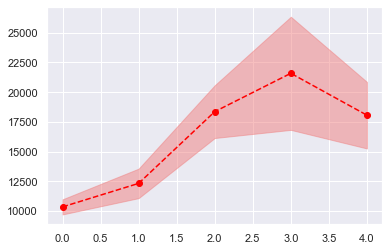

In [209]:
df_tempo = dfTwo.groupby(['name','GenoA', 'GenoB'], as_index=False)

bins = df_tempo.get_group(("Contact","KO_OXT", "WT_OXT")).groupby('bin')['bin'].mean()
totalLength = df_tempo.get_group(("Contact","KO_OXT", "WT_OXT")).groupby('bin')['totalLength'].mean() #Y is mean
std = df_tempo.get_group(("Contact","KO_OXT", "WT_OXT")).groupby('bin')['totalLength'].std() # Error is std
SEM = std/math.sqrt(len(std))

plt.errorbar(bins, totalLength, linestyle='--', marker='o', color = 'red')
plt.fill_between(bins, totalLength-SEM, totalLength+SEM, color='lightcoral', alpha=0.5)

plt.show()

In [193]:
SEM

bin
0     634.380454
1    1238.740828
2    2216.301437
3    4754.783354
4    2798.128525
Name: totalLength, dtype: float64

## DO FOR DIFFERENT CAGES: ##

Contact
there are 6 cages
 **** Hetero_NaCl ****
[4809322 4809319 4809618 4809235 4724553 4724399]
rf1:4809322
[4809322 4809319 4809320]
Same ID ... Continue
rf2-2:4809319
rf2-2:4809320
rf1:4809319
[4809322 4809319 4809320]
rf2-2:4809322
Same ID ... Continue
rf2-2:4809320
rf1:4809618
[4809618 4809617 4809613 4809624]
Same ID ... Continue
rf2-2:4809617
rf2-2:4809613
rf2-2:4809624
rf1:4809235
[4809235 4724149 4612516 4724455]
Same ID ... Continue
rf2-2:4724149
rf2-2:4612516
rf2-2:4724455
rf1:4724553
[4724553 4724399 4724544 4809291]
Same ID ... Continue
rf2-2:4724399
rf2-2:4724544
rf2-2:4809291
rf1:4724399
[4724553 4724399 4724544 4809291]
rf2-2:4724553
Same ID ... Continue
rf2-2:4724544
rf2-2:4809291
 **** KO_NaCl ****
[4809320 4809617 4612516 4612275]
rf1:4809320
[4809322 4809319 4809320]
rf2-2:4809322
rf2-2:4809319
Same ID ... Continue
rf1:4809617
[4809618 4809617 4809613 4809624]
rf2-2:4809618
Same ID ... Continue
rf2-2:4809613
rf2-2:4809624
rf1:4612516
[4809235 4724149 4612516 47244

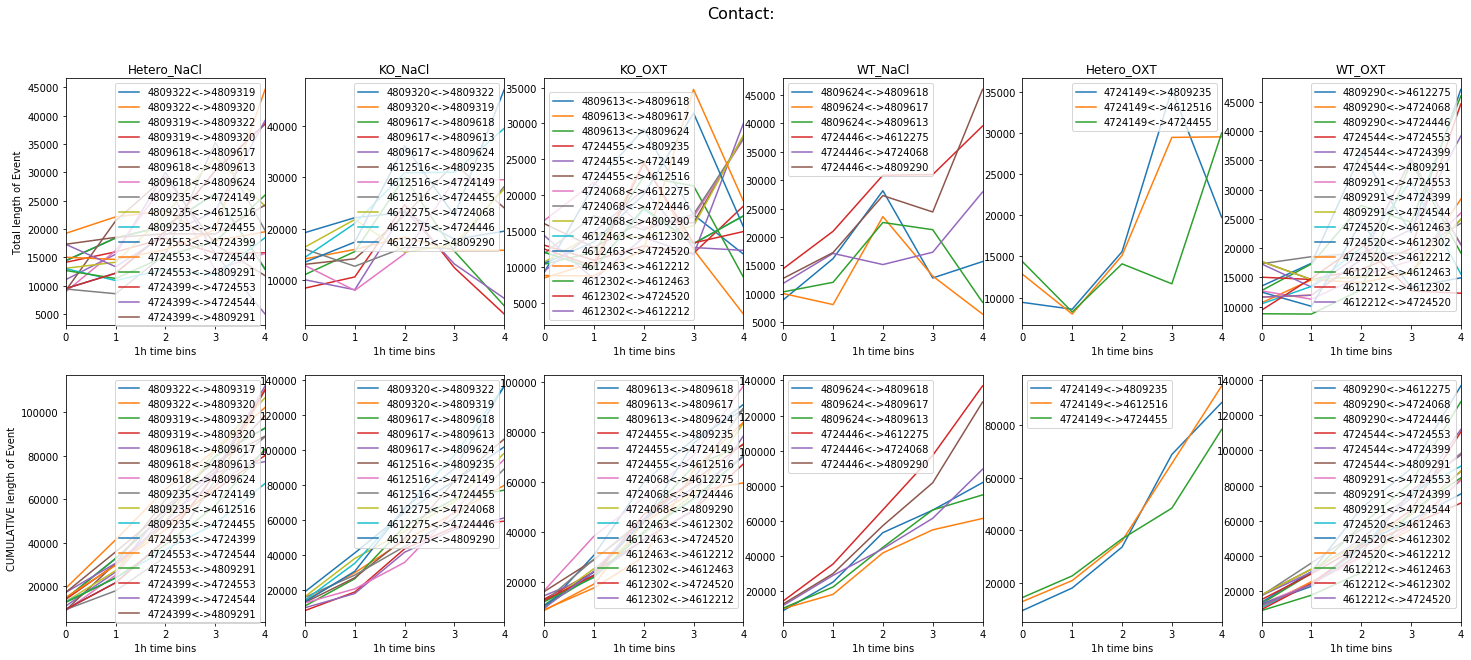

Oral-oral Contact
there are 6 cages
 **** Hetero_NaCl ****
[4809322 4809319 4809618 4809235 4724553 4724399]
rf1:4809322
[4809322 4809319 4809320]
Same ID ... Continue
rf2-2:4809319
rf2-2:4809320
rf1:4809319
[4809322 4809319 4809320]
rf2-2:4809322
Same ID ... Continue
rf2-2:4809320
rf1:4809618
[4809618 4809617 4809613 4809624]
Same ID ... Continue
rf2-2:4809617
rf2-2:4809613
rf2-2:4809624
rf1:4809235
[4809235 4724149 4612516 4724455]
Same ID ... Continue
rf2-2:4724149
rf2-2:4612516
rf2-2:4724455
rf1:4724553
[4724553 4724399 4724544 4809291]
Same ID ... Continue
rf2-2:4724399
rf2-2:4724544
rf2-2:4809291
rf1:4724399
[4724553 4724399 4724544 4809291]
rf2-2:4724553
Same ID ... Continue
rf2-2:4724544
rf2-2:4809291
 **** KO_NaCl ****
[4809320 4809617 4612516 4612275]
rf1:4809320
[4809322 4809319 4809320]
rf2-2:4809322
rf2-2:4809319
Same ID ... Continue
rf1:4809617
[4809618 4809617 4809613 4809624]
rf2-2:4809618
Same ID ... Continue
rf2-2:4809613
rf2-2:4809624
rf1:4612516
[4809235 4724149 461

KeyboardInterrupt: 

In [120]:
#Plot the data OF INDIVIDUALS MICE for the Different CAGES

for beh in dfTwo['name'].unique():
    print(beh)
    fig, ax = plt.subplots(nrows=2,ncols=6,figsize=(25,10)) #Create a figure with 2 rows and 6 columns of subplots
    fig.suptitle(f"{beh}:" , fontsize=16)
    
    count = 0
    
    nb_cages = len(dfTwo['Cage'].unique())
    print(f"there are {nb_cages} cages: {dfTwo['Cage'].unique()}")
    for cage in dfTwo['Cage'].unique(): #One graph of individual traces per cage
#         for geno in dfTwo[(dfTwo['Cage']==cage)]['GenoA'].unique(): #O
            print(f" **** {geno} ****")
    #         rfs = [] #List to follow which rfid is already done
            print(dfTwo[(dfTwo['name']==beh) & (dfTwo['GenoA']==geno)]['RFidA'].unique())
            for rf1 in dfTwo[(dfTwo['name']==beh) & (dfTwo['GenoA']==geno)]['RFidA'].unique():
                print(f"rf1:{rf1}")
                print(dfTwo[(dfTwo['Cage']==dfTwo[(dfTwo['RFidA']==rf1)]['Cage'].unique()[0])]['RFidA'].unique())
                for rf2 in dfTwo[(dfTwo['Cage']==dfTwo[(dfTwo['RFidA']==rf1)]['Cage'].unique()[0])]['RFidA'].unique():
    #                 print(f"rf2-1:{rf2}")
                    if rf1 == rf2:
                        print("Same ID ... Continue")
                        continue
                    print(f"rf2-2:{rf2}")

                    df_temp = dfTwo.groupby(['name','GenoA']).get_group((beh,geno)) #Define the Groupby dataframe

                    df_temp[(df_temp['RFidA']==rf1) & (df_temp['RFidB']==rf2)].plot(x='bin', y='totalLength', label=f"{rf1}<->{rf2}", ax=ax[0,count])
                    df_temp[(df_temp['RFidA']==rf1) & (df_temp['RFidB']==rf2)].plot(x='bin', y='totalLength_cum', label=f"{rf1}<->{rf2}", ax=ax[1,count])
                    ax[0,count].set_xlabel('1h time bins')
                    ax[0,count].set_title(geno)
                    ax[1,count].set_xlabel('1h time bins')

            plt.xticks(np.arange(0,5,step=1)) #x-axis with 0 to 4 bins
            ax[0,0].set_ylabel('Total length of Event') #Y-axis label on left graph
            ax[1,0].set_ylabel('CUMULATIVE length of Event')

            count += 1
        
    plt.show() #Display the figures
#     fig.savefig(f"Hab_1h-bins_{beh}_individuals.png", dpi=100) # SAVE A .PNG FIGURE

In [ ]:
#Create a dataframe "dfTwo" with the behaviors involving TWO animals!
behaviorsThree = ['Group3', 'Nest3'] #SOME MISSING HERE ??!
dfThree = df[df['name'].isin(behaviorsOne)] #Create the dataframe from the main DF
dfThree = dfThree.drop(columns=["idC", "idD","GenoC","GenoD",'RFidC','RFidD']) #Removes useless columns
dfThree

In [ ]:
#Create a dataframe "dfTwo" with the behaviors involving TWO animals!
behaviorsFour = ['Group4', 'Nest4'] #SOME MISSING HERE ??!
dfFour = df[df['name'].isin(behaviorsOne)] #Create the dataframe from the main DF
dfFour = dfThree.drop(columns=["idC", "idD","GenoC","GenoD",'RFidC','RFidD']) #Removes useless columns
dfFour

In [336]:
#TEST USE THE FOR LOOP WITHIN THE GROUPBY PARAM!!

# df_temp = dfOne.groupby(['name','GenoA']).get_group((beh,geno)) #Define the Groupby dataframe

# for (beh, geno), group in df_temp:
#     print(name)
#     pr
#     fig, ax = plt.subplots(nrows=2,ncols=6,figsize=(25,10)) #Create a figure with 2 rows and 6 columns of subplots
#     fig.suptitle(f"{beh}:" , fontsize=16)
    
#     count = 0
#     for geno in dfOne['GenoA'].unique():
# #         print(geno)
#         for rf in dfOne[(dfOne['name']==beh) & (dfOne['GenoA']==geno)]['RFidA'].unique():
            
#             df_temp[df_temp['RFidA']==rf].plot(x='bin', y='totalLength', label=rf, ax=ax[0,count])
#             df_temp[df_temp['RFidA']==rf].plot(x='bin', y='totalLength_cum', label=rf, ax=ax[1,count])
#             ax[0,count].set_xlabel('1h time bins')
#             ax[0,count].set_title(geno)
#             ax[1,count].set_xlabel('1h time bins')
#         plt.xticks(np.arange(0,5,step=1)) #x-axis with 0 to 4 bins
#         ax[0,0].set_ylabel('Total length of Event') #Y-axis label on left graph
#         ax[1,0].set_ylabel('CUMULATIVE length of Event')
        
#         count += 1
        
#     plt.show() #Dsiplay the figure
#     fig.savefig(f"Hab_1h-bins_{beh}_individuals.png", dpi=100) # SAVE A .PNG FIGURE



In [330]:
for (i,j),k in dfOne.groupby(['name','GenoA']):
    print(i)
    print(j)

Huddling
Hetero_NaCl
Huddling
Hetero_OXT
Huddling
KO_NaCl
Huddling
KO_OXT
Huddling
WT_NaCl
Huddling
WT_OXT
Move
Hetero_NaCl
Move
Hetero_OXT
Move
KO_NaCl
Move
KO_OXT
Move
WT_NaCl
Move
WT_OXT
Move isolated
Hetero_NaCl
Move isolated
Hetero_OXT
Move isolated
KO_NaCl
Move isolated
KO_OXT
Move isolated
WT_NaCl
Move isolated
WT_OXT
Rear isolated
Hetero_NaCl
Rear isolated
Hetero_OXT
Rear isolated
KO_NaCl
Rear isolated
KO_OXT
Rear isolated
WT_NaCl
Rear isolated
WT_OXT
Rearing
Hetero_NaCl
Rearing
Hetero_OXT
Rearing
KO_NaCl
Rearing
KO_OXT
Rearing
WT_NaCl
Rearing
WT_OXT
SAP
Hetero_NaCl
SAP
Hetero_OXT
SAP
KO_NaCl
SAP
KO_OXT
SAP
WT_NaCl
SAP
WT_OXT
Stop isolated
Hetero_NaCl
Stop isolated
Hetero_OXT
Stop isolated
KO_NaCl
Stop isolated
KO_OXT
Stop isolated
WT_NaCl
Stop isolated
WT_OXT
WallJump
Hetero_NaCl
WallJump
Hetero_OXT
WallJump
KO_NaCl
WallJump
KO_OXT
WallJump
WT_NaCl
WallJump
WT_OXT
WaterPoint
Hetero_NaCl
WaterPoint
Hetero_OXT
WaterPoint
KO_NaCl
WaterPoint
KO_OXT
WaterPoint
WT_NaCl
WaterPoint
WT

In [232]:
result = df.sort_values(['RFidA','name','GenoA','bin'])
result[['name', 'GenoA','bin', 'RFidA', 'RFidB','totalLength', 'totalLength_cum']]

name    GenoA  bin    RFidA      RFidB  totalLength  \
39639  Approach contact   WT_OXT    0  4612212  4612463.0          554   
39640  Approach contact   WT_OXT    0  4612212  4612302.0          527   
39641  Approach contact   WT_OXT    0  4612212  4724520.0          586   
39939  Approach contact   WT_OXT    1  4612212  4612463.0          546   
39940  Approach contact   WT_OXT    1  4612212  4612302.0          456   
...                 ...      ...  ...      ...        ...          ...   
11045        WaterPoint  WT_NaCl   25  4809624  4809613.0            0   
11345        WaterPoint  WT_NaCl   26  4809624  4809613.0            0   
11645        WaterPoint  WT_NaCl   27  4809624  4809613.0            0   
11945        WaterPoint  WT_NaCl   28  4809624  4809613.0            0   
12245        WaterPoint  WT_NaCl   29  4809624  4809613.0            0   

       totalLength_cum  
39639            554.0  
39640           1081.0  
39641           1667.0  
39939           2213.0  
39940           2669.0  
...                ...  
11045              0.0  
11345              0.0  
11645              0.0  
11945              0.0  
12245              0.0  

[48510 rows x 7 columns]

In [220]:
#Creates a Dataframe with the Mean of each parameter for the different groups
df_genotypes = df.groupby(['name','GenoA','bin'], axis=0)["totalLength", "meanLength", "medianLength","numberOfEvents"].mean().reset_index()
df_genotypes

name        GenoA  bin  totalLength  meanLength  \
0     Approach contact  Hetero_NaCl    0     770.5000    4.350189   
1     Approach contact  Hetero_NaCl    1     863.7500    4.558097   
2     Approach contact  Hetero_NaCl    2     992.1250    4.114422   
3     Approach contact  Hetero_NaCl    3     741.8125    4.401577   
4     Approach contact  Hetero_NaCl    4     726.0000    4.449439   
...                ...          ...  ...          ...         ...   
4855        WaterPoint       WT_OXT   25       0.0000         NaN   
4856        WaterPoint       WT_OXT   26       0.0000         NaN   
4857        WaterPoint       WT_OXT   27       0.0000         NaN   
4858        WaterPoint       WT_OXT   28       0.0000         NaN   
4859        WaterPoint       WT_OXT   29       0.0000         NaN   

      medianLength  numberOfEvents  
0          2.37500        180.7500  
1          2.43750        193.8750  
2          2.18750        247.0000  
3          2.34375        176.8125  
4          2.12500        170.6250  
...            ...             ...  
4855           NaN          0.0000  
4856           NaN          0.0000  
4857           NaN          0.0000  
4858           NaN          0.0000  
4859           NaN          0.0000  

[4860 rows x 7 columns]

In [189]:
df_genotypes["totalLength_cum"] = df_genotypes[(df_genotypes['GenoA'] == 'WT_OXT')]["totalLength"].cumsum()
df_genotypes[0:10]

GenoA  bin  totalLength  meanLength  medianLength  numberOfEvents  \
0  Hetero_NaCl    0   847.039683    8.230984      3.526408      119.304233   
1  Hetero_NaCl    1   838.896825    8.128481      3.526316      122.177249   
2  Hetero_NaCl    2   883.767196    9.069534      3.478947      133.370370   
3  Hetero_NaCl    3   762.052910    8.579657      3.705674      109.772487   
4  Hetero_NaCl    4   749.441799    8.284390      3.456140      104.867725   
5  Hetero_NaCl    5   721.021164    8.770533      3.524823       97.415344   
6  Hetero_NaCl    6   787.113757    9.189799      3.455830      110.216931   
7  Hetero_NaCl    7   721.243386   10.292475      3.794224       91.206349   
8  Hetero_NaCl    8   796.854497    8.624752      3.740351      112.500000   
9  Hetero_NaCl    9   753.603175    9.106475      3.012500      104.939153   

   totalLength_cum  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
5              NaN  
6              NaN  
7              NaN  
8              NaN  
9              NaN

In [192]:
df_genotypes.loc[df_genotypes.GenoA=='WT_OXT', "totalLength_cum"] = df_genotypes.loc[df_genotypes.GenoA=='WT_OXT', "totalLength"].cumsum()
df_genotypes.loc[df_genotypes.GenoA=='WT_NaCl', "totalLength_cum"] = df_genotypes.loc[df_genotypes.GenoA=='WT_NaCl', "totalLength"].cumsum()
df_genotypes.loc[df_genotypes.GenoA=='KO_OXT', "totalLength_cum"] = df_genotypes.loc[df_genotypes.GenoA=='KO_OXT', "totalLength"].cumsum()
df_genotypes.loc[df_genotypes.GenoA=='KO_NaCl', "totalLength_cum"] = df_genotypes.loc[df_genotypes.GenoA=='KO_NaCl', "totalLength"].cumsum()
df_genotypes

GenoA  bin  totalLength  meanLength  medianLength  numberOfEvents  \
0    Hetero_NaCl    0   847.039683    8.230984      3.526408      119.304233   
1    Hetero_NaCl    1   838.896825    8.128481      3.526316      122.177249   
2    Hetero_NaCl    2   883.767196    9.069534      3.478947      133.370370   
3    Hetero_NaCl    3   762.052910    8.579657      3.705674      109.772487   
4    Hetero_NaCl    4   749.441799    8.284390      3.456140      104.867725   
..           ...  ...          ...         ...           ...             ...   
175       WT_OXT   25   786.754667  188.904958    173.969484      151.394667   
176       WT_OXT   26   693.869333   22.608309      3.025478      118.632000   
177       WT_OXT   27   475.021333   15.445399      3.087302       76.821333   
178       WT_OXT   28   878.101333   74.072490     57.292490      134.376000   
179       WT_OXT   29   821.357333   18.957888     10.155405      141.205333   

     totalLength_cum  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
..               ...  
175     18987.101333  
176     19680.970667  
177     20155.992000  
178     21034.093333  
179     21855.450667  

[180 rows x 7 columns]

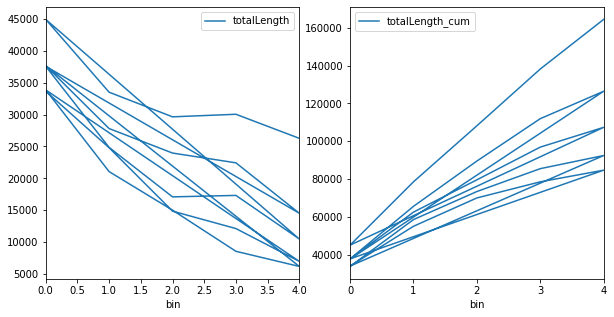

In [23]:
fig, ax = plt.subplots(1,2,figsize=(10, 5)) #Subplot
plt.xticks(np.arange(0, 5, step=1)) 

result[(result['GenoA'] == 'WT_OXT')&(result['name'] == 'Move')].plot(x="bin",y="totalLength", ax=ax[0])
result[(result['GenoA'] == 'WT_OXT')&(result['name'] == 'Move')].plot(x="bin",y="totalLength_cum", ax=ax[1])

In [196]:
#Display the different behaviors in the dataframe
df.name.unique()

AttributeError: 'DataFrame' object has no attribute 'name'

In [ ]:
for beh in dfOne.name.unique():
    fig, ([ax11,ax12],[ax21,ax22], [ax31, ax32], [ax41, ax42], [ax51,ax52]) = plt.subplots(5,2,figsize=(15, 30)) #Subplot (2 lines, 2 columns)
#     ax = plt.gca() # get current axis

# # ##  ###   #####     ########        ###########           #####################     
    # SET UP THE LEFT GRAPH (ax11) with TotalLength
    ax11.set_title(f'Habituation - {beh} - TotalLength')
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="KO_NaCl")].plot(x='bin',y='totalLength',label="KO-NaCl",color='red',ax=ax11)
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="KO_OXT")].plot(x='bin',y='totalLength',label="KO-OXT",color='orange',ax=ax11)
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="WT_NaCl")].plot(x='bin',y='totalLength',label="WT-NaCl",color='blue',ax=ax11)
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="WT_OXT")].plot(x='bin',y='totalLength',label="WT-OXT",color='green',ax=ax11)
    ax11.set_xlabel("Timebins of 1 hour") #Set x-axis of ax11 subplot
    ax11.set_ylabel("Total Length of Events") #Set y-axis of ax11 subplot

    
    # SET UP THE RIGHT GRAPH (ax12) with CUMULATIVE TotalLength
    ax12.set_title(f'Habituation - {beh} - Cumulative TotalLength')
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="KO_NaCl")]["totalLength_cum"].plot(x='bin',label="KO-NaCl",color='red',ax=ax12)
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="KO_OXT")]["totalLength_cum"].plot(x='bin',label="KO-OXT",color='orange',ax=ax12)
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="WT_NaCl")]["totalLength_cum"].plot(x='bin',label="WT-NaCl",color='blue',ax=ax12)
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="WT_OXT")]["totalLength_cum"].plot(x='bin',label="WT-OXT",color='green',ax=ax12)
    ax12.set_xlabel("Timebins of 1 hour") #Set x-axis of ax12 subplot
    ax12.set_ylabel("Cumulative Duration of Events") #Set y-axis of ax12 subplot

# # ##  ###   #####     ########        ###########           #####################     
    # SET UP THE LEFT GRAPH (ax21) with NumberOfEvents
    ax21.set_title(f'Habituation - {beh} - NumberOfEvents')
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="KO_NaCl")].plot(x='bin',y='numberOfEvents',label="KO-NaCl",color='red',ax=ax21)
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="KO_OXT")].plot(x='bin',y='numberOfEvents',label="KO-OXT",color='orange',ax=ax21)
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="WT_NaCl")].plot(x='bin',y='numberOfEvents',label="WT-NaCl",color='blue',ax=ax21)
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="WT_OXT")].plot(x='bin',y='numberOfEvents',label="WT-OXT",color='green',ax=ax21)
    ax21.set_xlabel("Timebins of 1 hour") #Set x-axis of ax21 subplot
    ax21.set_ylabel("Number of Events") #Set y-axis of ax21 subplot

    # SET UP THE RIGHT GRAPH (ax22) with CUMULATIVE NumberOfEvents
    ax22.set_title(f'Habituation - {beh} - Cumulative NumberOfEvents')
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="KO_NaCl")]["numberOfEvents"].cumsum().plot(x='bin',y='numberOfEvents',label="KO-NaCl",color='red',ax=ax22)
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="KO_OXT")]["numberOfEvents"].cumsum().plot(x='bin',y='numberOfEvents',label="KO-OXT",color='orange',ax=ax22)
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="WT_NaCl")]["numberOfEvents"].cumsum().plot(x='bin',y='numberOfEvents',label="WT-NaCl",color='blue',ax=ax22)
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="WT_OXT")]["numberOfEvents"].cumsum().plot(x='bin',y='numberOfEvents',label="WT-OXT",color='green',ax=ax2)
    ax22.set_xlabel("Timebins of 1 hour") #Set x-axis of ax22 subplot
    ax22.set_ylabel("Cumulative Number of Events") #Set y-axis of ax22 subplot

# # ##  ###   #####     ########        ###########           #####################     
        # SET UP THE LEFT GRAPH (ax31) with meanLength
    ax31.set_title(f'Habituation - {beh} - meanLength')
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="KO_NaCl")].plot(x='bin',y='meanLength',label="KO-NaCl",color='red',ax=ax31)
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="KO_OXT")].plot(x='bin',y='meanLength',label="KO-OXT",color='orange',ax=ax31)
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="WT_NaCl")].plot(x='bin',y='meanLength',label="WT-NaCl",color='blue',ax=ax31)
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="WT_OXT")].plot(x='bin',y='meanLength',label="WT-OXT",color='green',ax=ax31)
    ax31.set_xlabel("Timebins of 10 minutes") #Set x-axis of ax31 subplot
    ax31.set_ylabel("Mean Length of Events") #Set y-axis of ax31 subplot

    
    # SET UP THE TOP-RIGHT GRAPH (ax32) with CUMULATIVE meanLength
    ax32.set_title(f'Habituation - {beh} - Cumulative meanLength')
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="KO_NaCl")]["meanLength"].cumsum().plot(x='bin',y='meanLength',label="KO-NaCl",color='red',ax=ax32)
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="KO_OXT")]["meanLength"].cumsum().plot(x='bin',y='meanLength',label="KO-OXT",color='orange',ax=ax32)
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="WT_NaCl")]["meanLength"].cumsum().plot(x='bin',y='meanLength',label="WT-NaCl",color='blue',ax=ax32)
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="WT_OXT")]["meanLength"].cumsum().plot(x='bin',y='meanLength',label="WT-OXT",color='green',ax=ax32)
    ax32.set_xlabel("Timebins of 10 minutes") #Set x-axis of ax32 subplot
    ax32.set_ylabel("Cumulative meanLength of Events") #Set y-axis of ax32 subplot

# # ##  ###   #####     ########        ###########           #####################     
    # SET UP THE TOP-LEFT GRAPH (ax41) with medianLength
    ax41.set_title(f'Habituation - {beh} - medianLength')
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="KO_NaCl")].plot(x='bin',y='medianLength',label="KO-NaCl",color='red',ax=ax41)
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="KO_OXT")].plot(x='bin',y='medianLength',label="KO-OXT",color='orange',ax=ax41)
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="WT_NaCl")].plot(x='bin',y='medianLength',label="WT-NaCl",color='blue',ax=ax41)
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="WT_OXT")].plot(x='bin',y='medianLength',label="WT-OXT",color='green',ax=ax41)
    ax41.set_xlabel("Timebins of 10 minutes") #Set x-axis of ax41 subplot
    ax41.set_ylabel("Median Length of Events") #Set y-axis of ax41 subplot

    # SET UP THE TOP-RIGHT GRAPH (ax42) with CUMULATIVE medianLength
    ax42.set_title(f'Habituation - {beh} - Cumulative medianLength')
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="KO_NaCl")]["medianLength"].cumsum().plot(x='bin',y='medianLength',label="KO-NaCl",color='red',ax=ax42)
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="KO_OXT")]["medianLength"].cumsum().plot(x='bin',y='medianLength',label="KO-OXT",color='orange',ax=ax42)
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="WT_NaCl")]["medianLength"].cumsum().plot(x='bin',y='medianLength',label="WT-NaCl",color='blue',ax=ax42)
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="WT_OXT")]["medianLength"].cumsum().plot(x='bin',y='medianLength',label="WT-OXT",color='green',ax=ax42)
    ax42.set_xlabel("Timebins of 10 minutes") #Set x-axis of ax42 subplot
    ax42.set_ylabel("Cumulative medianLength of Events") #Set y-axis of ax42 subplot

# # ##  ###   #####     ########        ###########           #####################     
    # SET UP THE TOP-LEFT GRAPH (ax51) with Standard Deviation
    ax51.set_title(f'Habituation - {beh} - stdLength')
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="KO_NaCl")].plot(x='bin',y='stdLength',label="KO-NaCl",color='red',ax=ax51)
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="KO_OXT")].plot(x='bin',y='stdLength',label="KO-OXT",color='orange',ax=ax51)
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="WT_NaCl")].plot(x='bin',y='stdLength',label="WT-NaCl",color='blue',ax=ax51)
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="WT_OXT")].plot(x='bin',y='stdLength',label="WT-OXT",color='green',ax=ax51)
    ax51.set_xlabel("Timebins of 10 minutes") #Set x-axis of ax51 subplot
    ax51.set_ylabel("Standard deviation of Events") #Set y-axis of ax51 subplot

    # SET UP THE TOP-RIGHT GRAPH (ax52) with CUMULATIVE stdLength
    ax52.set_title(f'Habituation - {beh} - Cumulative stdLength')
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="KO_NaCl")]["stdLength"].cumsum().plot(x='bin',y='stdLength',label="KO-NaCl",color='red',ax=ax52)
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="KO_OXT")]["stdLength"].cumsum().plot(x='bin',y='stdLength',label="KO-OXT",color='orange',ax=ax52)
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="WT_NaCl")]["stdLength"].cumsum().plot(x='bin',y='stdLength',label="WT-NaCl",color='blue',ax=ax52)
    dfOne[(dfOne['name']==beh)&(dfOne['GenoA']=="WT_OXT")]["stdLength"].cumsum().plot(x='bin',y='stdLength',label="WT-OXT",color='green',ax=ax52)
    ax52.set_xlabel("Timebins of 10 minutes") #Set x-axis of ax52 subplot
    ax52.set_ylabel("Cumulative Standard deviation of Events") #Set y-axis of ax52 subplot


    plt.show()